# eval trained or-panoptic model on val set data

Adapted from notebooks/vis_or_panoptic.ipynb

In [16]:
%load_ext autoreload
%autoreload 2

import glob
from pathlib import Path
import multiprocessing as mp
import os
# fmt: off
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
if str(Path(module_path) / 'demo') not in sys.path:
    sys.path.append(str(Path(module_path) / 'demo'))

import tempfile
import time
import warnings

import cv2
import numpy as np
import tqdm

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.projects.deeplab import add_deeplab_config
from detectron2.utils.logger import setup_logger

from predictor import VisualizationDemo


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Namespace(config_file='../configs/or-matseg-panoptic/maskformer2_R50_bs16_50ep.yaml', webcam=False, video_input=None, input=None, output=None, confidence_threshold=0.5, opts=['MODEL.WEIGHTS', '../output_or_matseg_panoptic_trainval/model_0329999.pth'])


100%|██████████| 5664/5664 [00:00<00:00, 67485.37it/s]


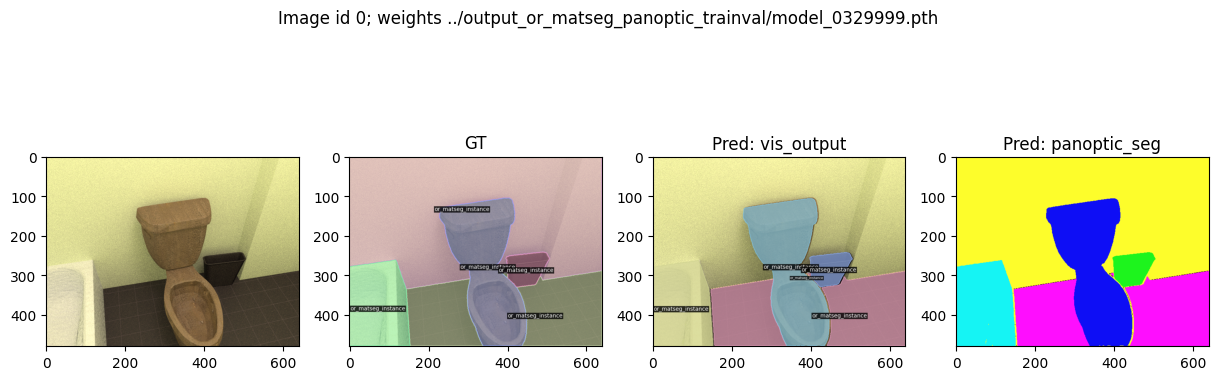

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/0.png


<Figure size 640x480 with 0 Axes>

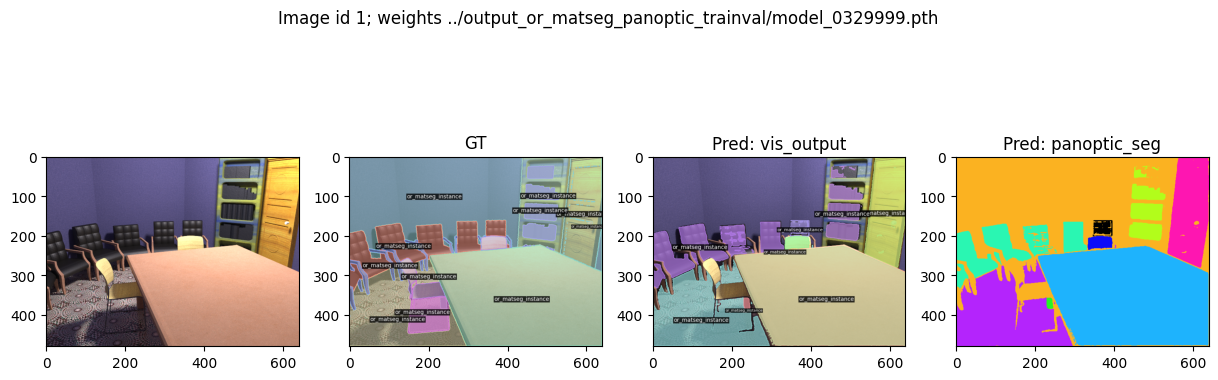

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/1.png


<Figure size 640x480 with 0 Axes>

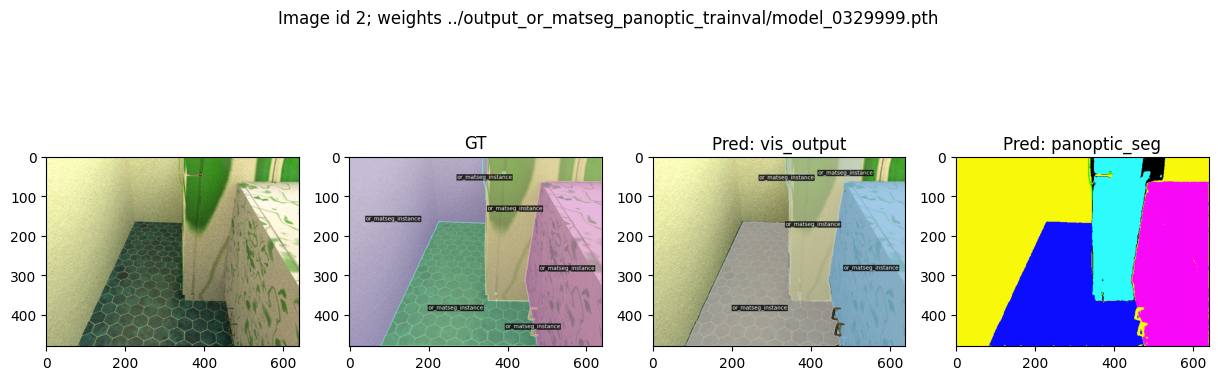

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/2.png


<Figure size 640x480 with 0 Axes>

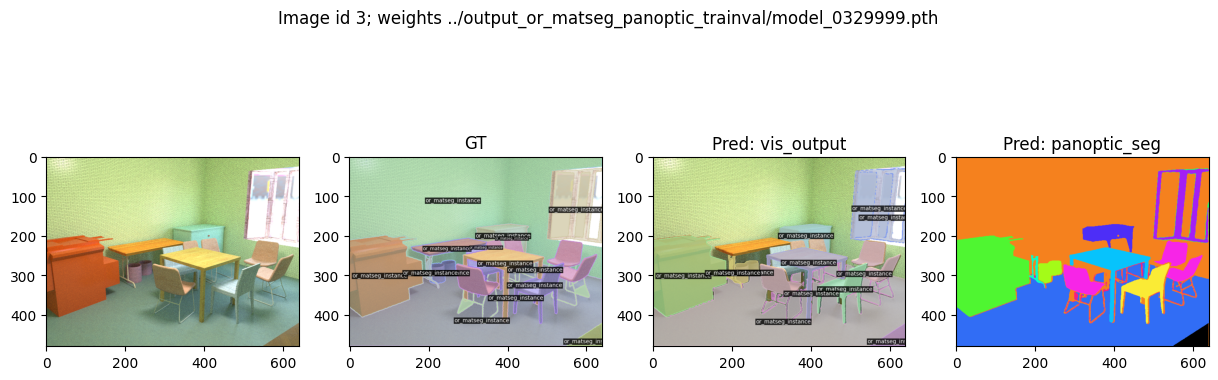

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/3.png


<Figure size 640x480 with 0 Axes>

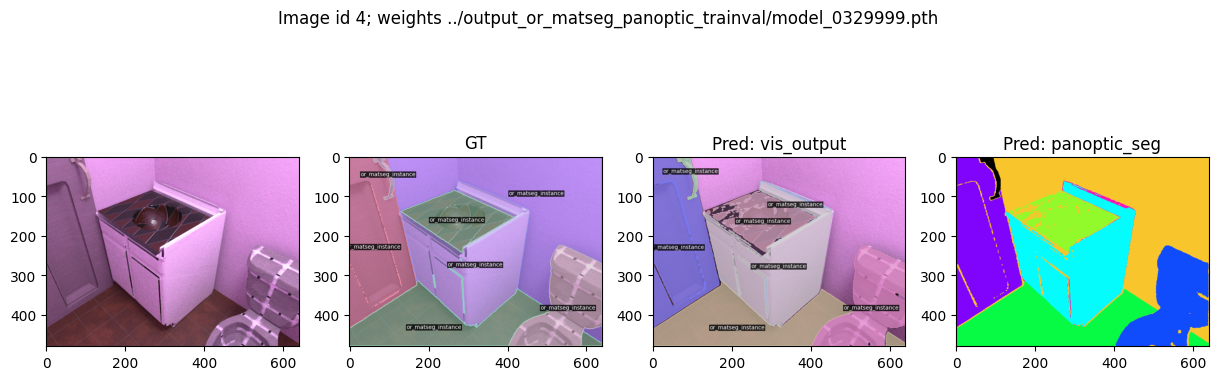

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/4.png


<Figure size 640x480 with 0 Axes>

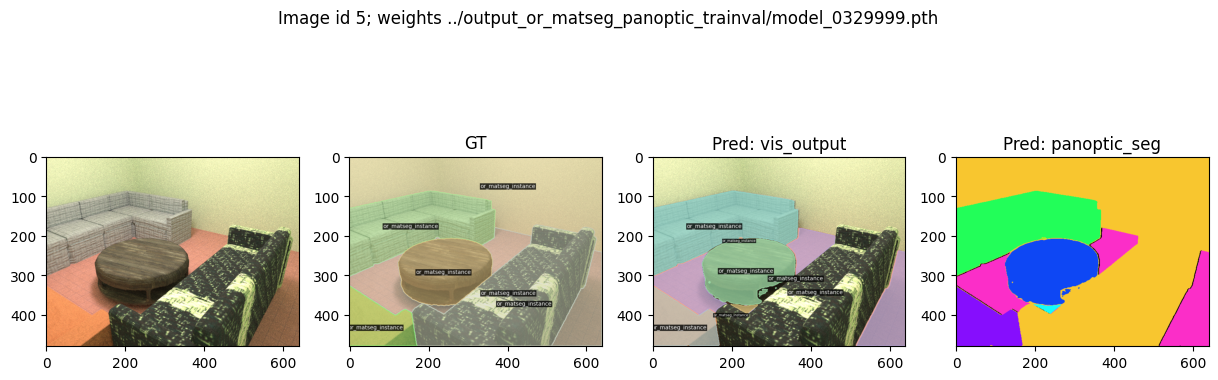

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/5.png


<Figure size 640x480 with 0 Axes>

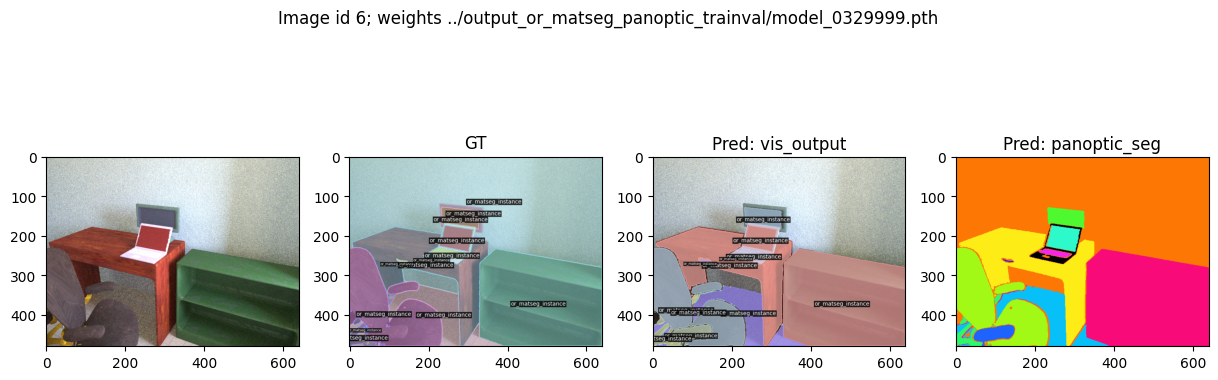

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/6.png


<Figure size 640x480 with 0 Axes>

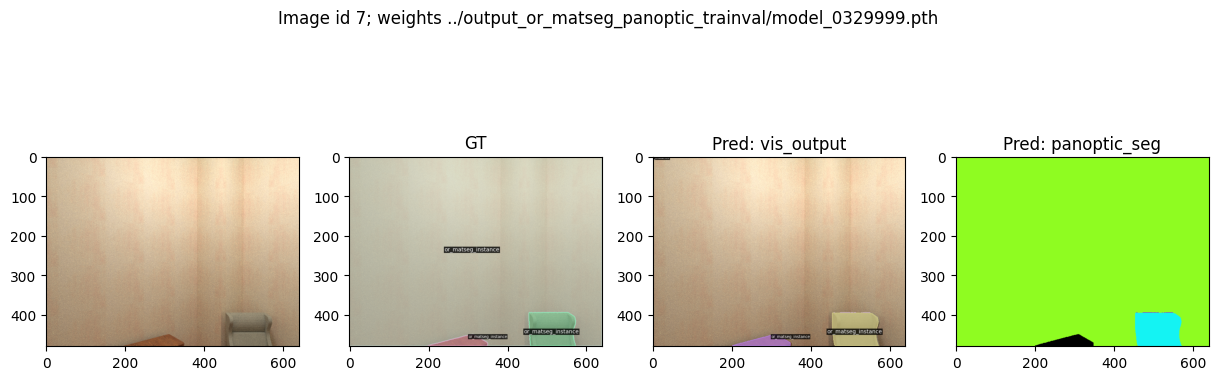

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/7.png


<Figure size 640x480 with 0 Axes>

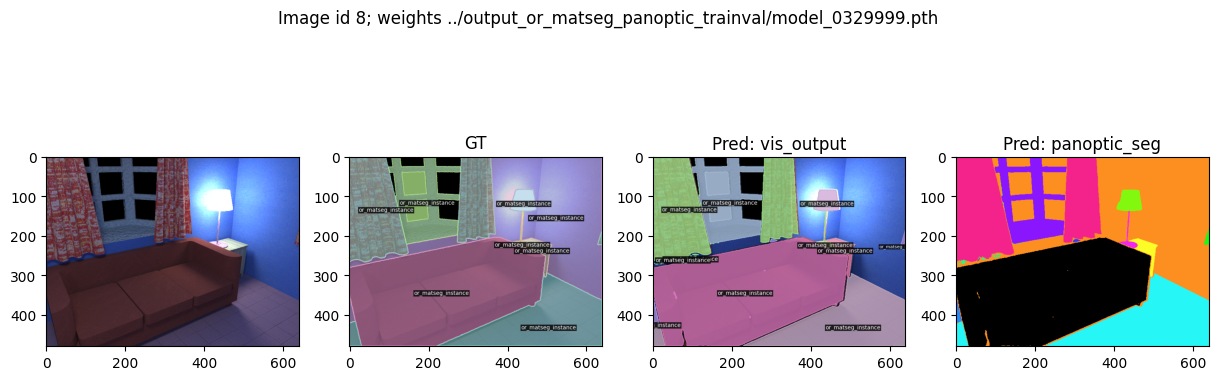

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/8.png


<Figure size 640x480 with 0 Axes>

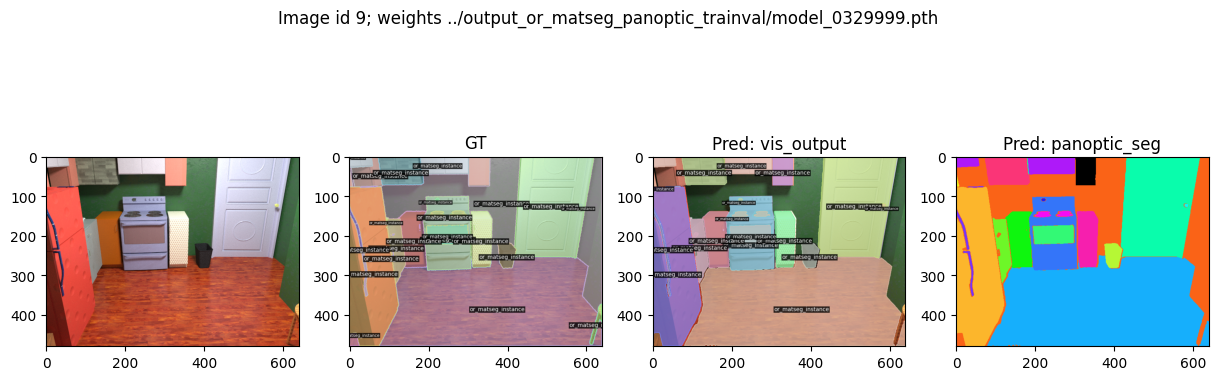

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/9.png


<Figure size 640x480 with 0 Axes>

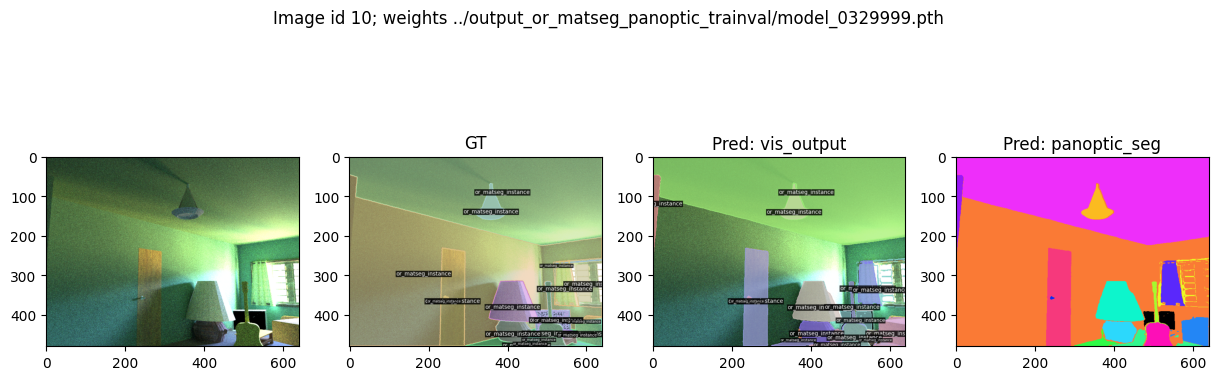

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/10.png


<Figure size 640x480 with 0 Axes>

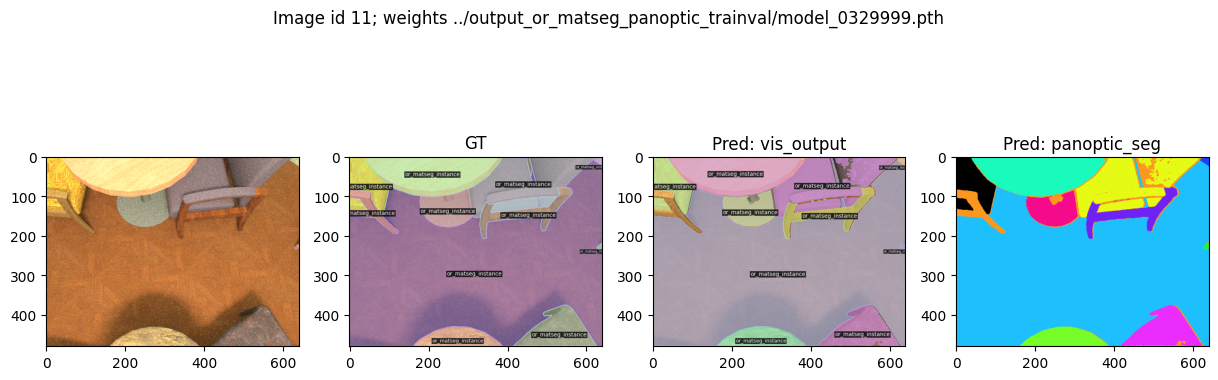

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/11.png


<Figure size 640x480 with 0 Axes>

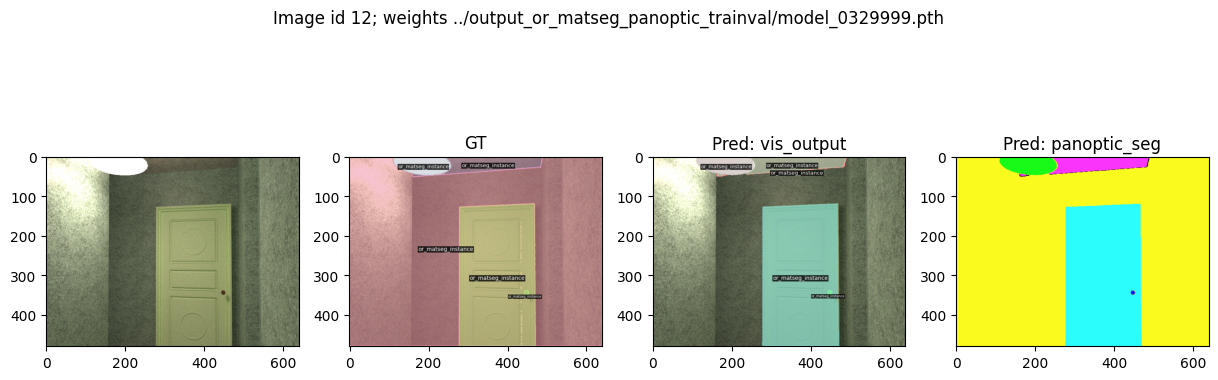

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/12.png


<Figure size 640x480 with 0 Axes>

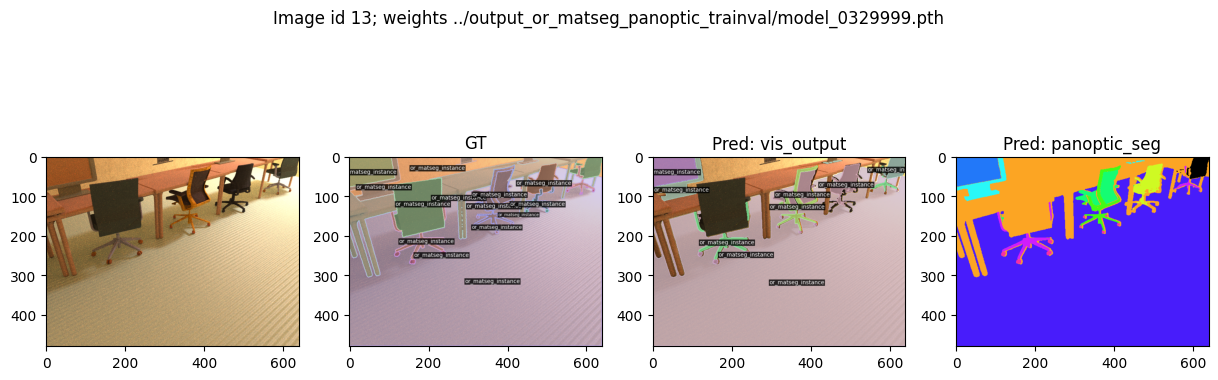

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/13.png


<Figure size 640x480 with 0 Axes>

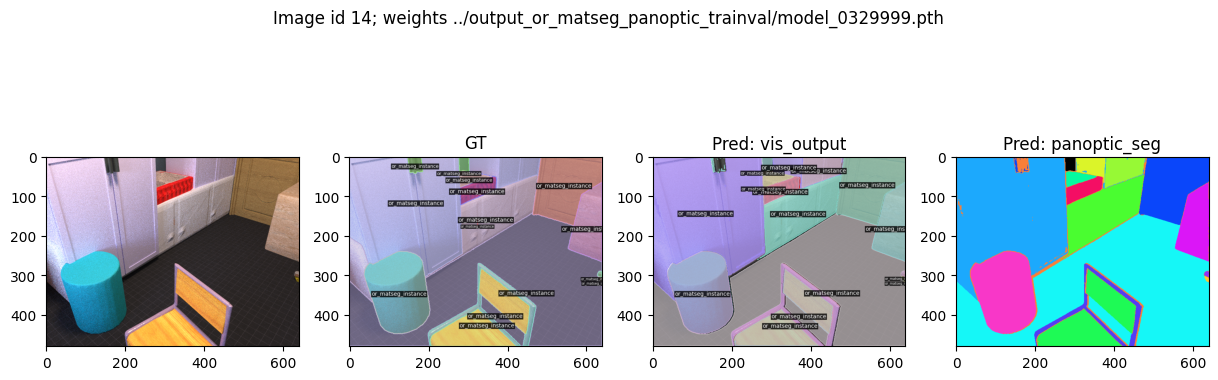

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/14.png


<Figure size 640x480 with 0 Axes>

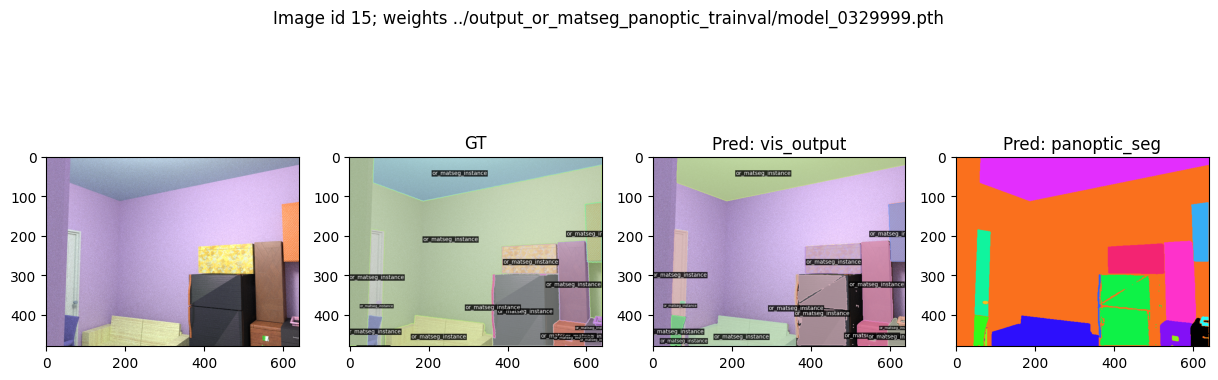

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/15.png


<Figure size 640x480 with 0 Axes>

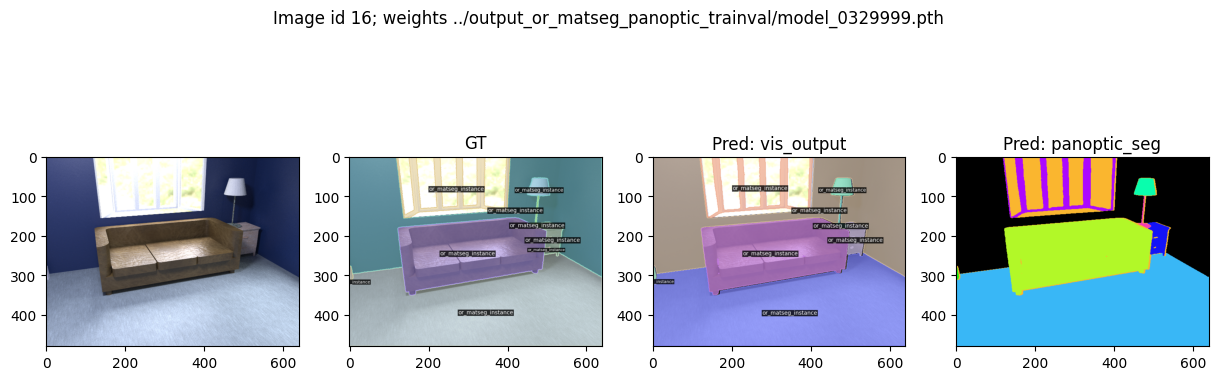

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/16.png


<Figure size 640x480 with 0 Axes>

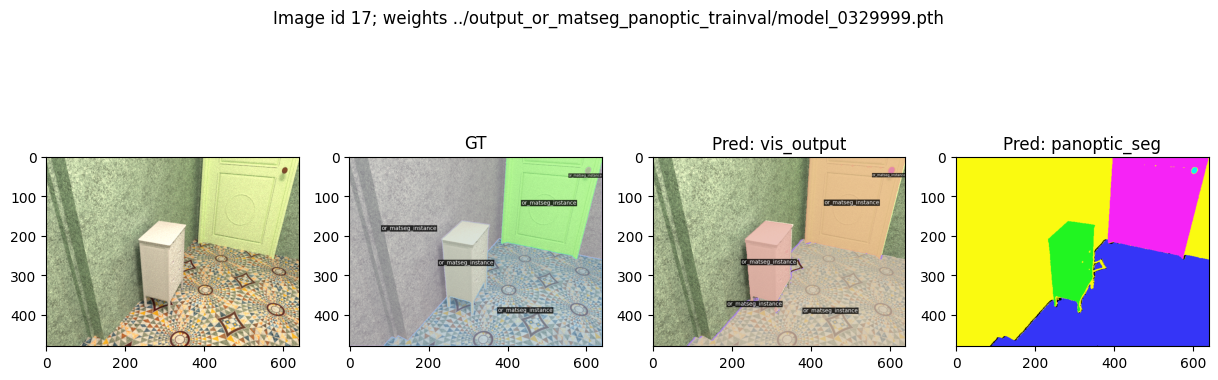

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/17.png


<Figure size 640x480 with 0 Axes>

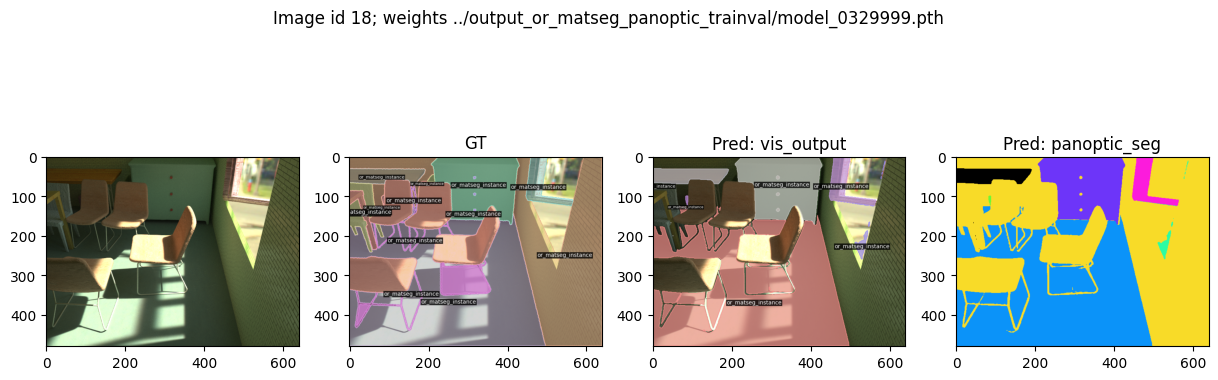

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/18.png


<Figure size 640x480 with 0 Axes>

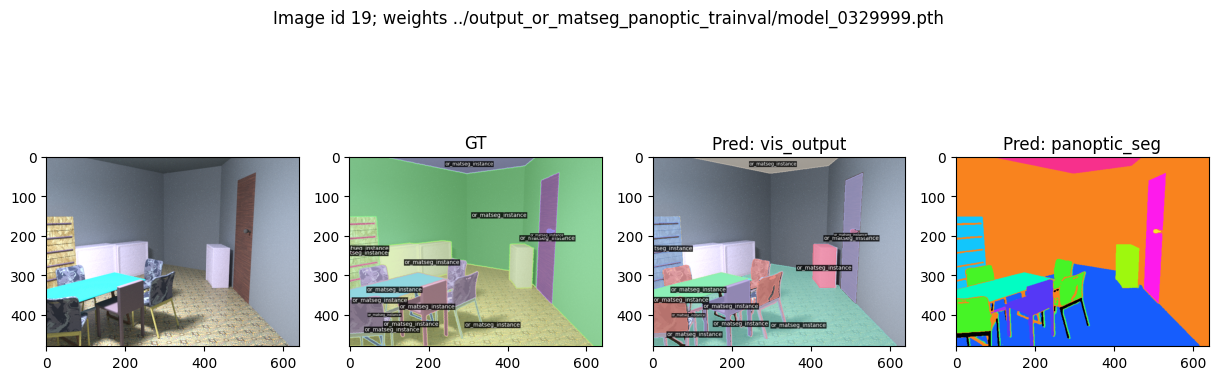

Saved to ../output_or_matseg_panoptic_trainval/vis/model_0329999/19.png


<Figure size 640x480 with 0 Axes>

In [28]:
from demo import setup_cfg, get_parser
from utils.utils_or.utils_or_vis import vis_index_map
parser = get_parser()
args_str = '--config-file ../configs/or-matseg-panoptic/maskformer2_R50_bs16_50ep.yaml --opts MODEL.WEIGHTS ../output_or_matseg_panoptic_trainval/model_0329999.pth'
args = parser.parse_args(args_str.split(' '))
print(args)
cfg = setup_cfg(args)
demo = VisualizationDemo(cfg)

from detectron2.data import MetadataCatalog, DatasetCatalog
or_matseg_panoptic_metadata = MetadataCatalog.get("or_matseg_panoptic_val")
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from mask2former.data.datasets.register_or_panoptic import load_or_panoptic_json, get_metadata
metadata = get_metadata()
panoptic_json = '/data/OpenRooms_public/im_matseg_pan_seg_rgb_val.json'
assert Path(panoptic_json).exists(), panoptic_json
image_root = '/data/OpenRooms_public'
panoptic_root = '/data/OpenRooms_public/im_matseg_pan_seg_rgb'

dataset_dicts = load_or_panoptic_json(
    panoptic_json, image_root, panoptic_root, metadata
)

vis_save_dir = Path(cfg.MODEL.WEIGHTS).parent / 'vis' / str(Path(cfg.MODEL.WEIGHTS).stem)
vis_save_dir.mkdir(exist_ok=True, parents=True)

for d in dataset_dicts[:20]:
    img = cv2.imread(d["file_name"])[:, :, ::-1]
    visualizer = Visualizer(img[:, :, ::-1], metadata=or_matseg_panoptic_metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    
    predictions, visualized_output = demo.run_on_image(img)

    # cv2_imshow(out.get_image()[:, :, ::-1])
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle('Image id %d; weights %s' % (d['image_id'], cfg.MODEL.WEIGHTS))
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    ax = plt.subplot(1, 4, 2)
    plt.imshow(out.get_image()[:, :, ::-1])
    ax.set_title('GT')
    ax = plt.subplot(1, 4, 3)
    plt.imshow(visualized_output.get_image()[:, :, ::-1])
    ax.set_title('Pred: vis_output')
    ax = plt.subplot(1, 4, 4)
    plt.imshow(vis_index_map(predictions['panoptic_seg'][0].cpu().numpy()+1))
    ax.set_title('Pred: panoptic_seg')
    plt.show()
    
    vis_save_path = vis_save_dir / ('%d.png' % d['image_id'])
    plt.savefig(vis_save_path)
    print('Saved to', vis_save_path)
    
    plt.show()
    
    # pan_seg_file_name = d['pan_seg_file_name']
    # assert Path(pan_seg_file_name).exists()


In [26]:
print(predictions.keys(), type(predictions['panoptic_seg']), type(predictions['instances']))

panoptic_seg, segments_info= predictions["panoptic_seg"]

print(panoptic_seg)

print(segments_info)

dict_keys(['sem_seg', 'panoptic_seg', 'instances']) <class 'tuple'> <class 'detectron2.structures.instances.Instances'>
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [3, 3, 3,  ..., 0, 0, 0],
        [3, 3, 3,  ..., 0, 0, 0],
        [3, 3, 3,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)
[{'id': 1, 'isthing': True, 'category_id': 0, 'area': 135.0}, {'id': 2, 'isthing': True, 'category_id': 0, 'area': 1130.0}, {'id': 3, 'isthing': True, 'category_id': 0, 'area': 107304.0}, {'id': 4, 'isthing': True, 'category_id': 0, 'area': 27757.0}, {'id': 5, 'isthing': True, 'category_id': 0, 'area': 5794.0}, {'id': 6, 'isthing': True, 'category_id': 0, 'area': 6290.0}]


0 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]]), {'id': 3, 'isthing': True, 'category_id': 0, 'area': 107304.0})


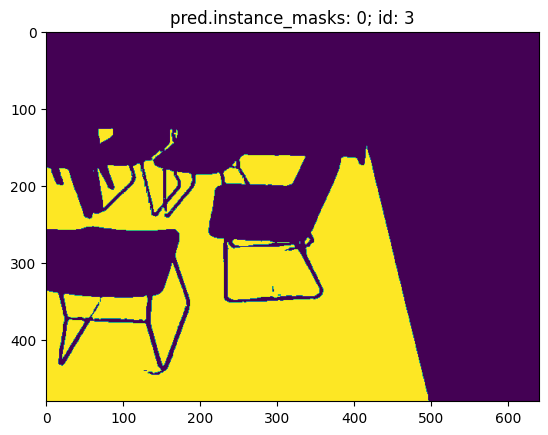

1 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), {'id': 4, 'isthing': True, 'category_id': 0, 'area': 27757.0})


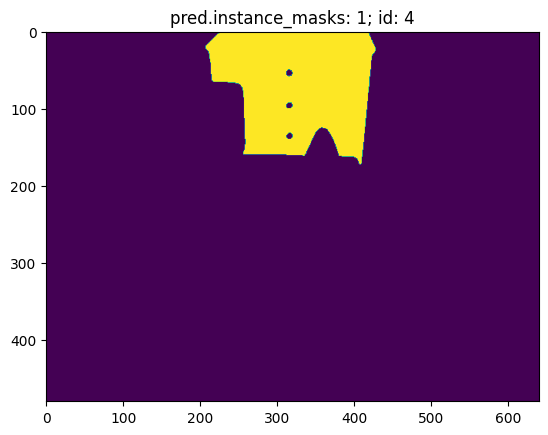

2 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), {'id': 6, 'isthing': True, 'category_id': 0, 'area': 6290.0})


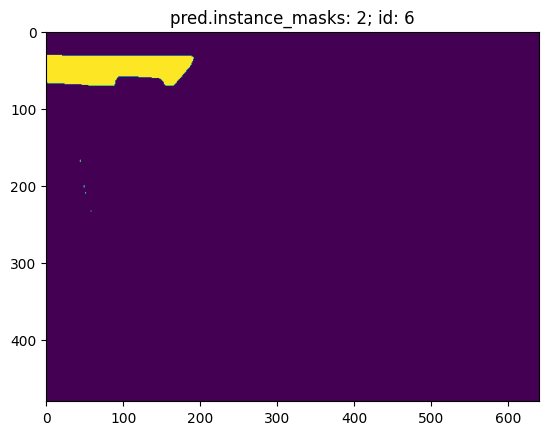

3 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), {'id': 5, 'isthing': True, 'category_id': 0, 'area': 5794.0})


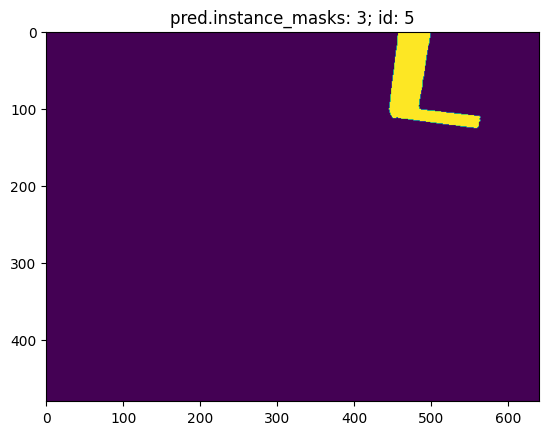

4 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), {'id': 2, 'isthing': True, 'category_id': 0, 'area': 1130.0})


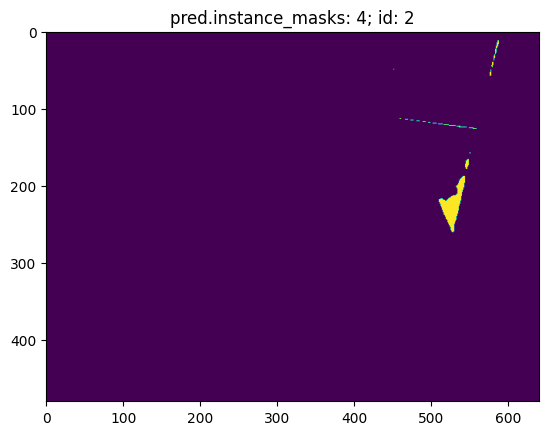

5 (array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), {'id': 1, 'isthing': True, 'category_id': 0, 'area': 135.0})


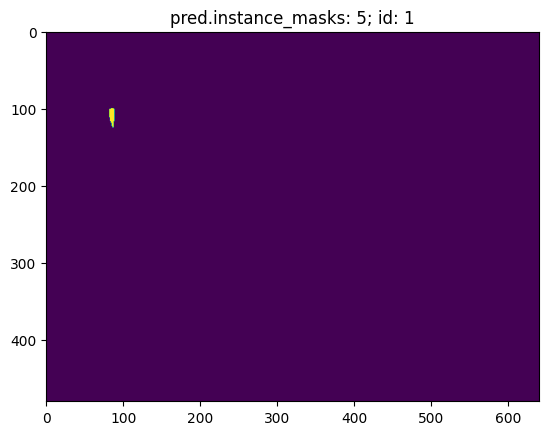

In [25]:
from detectron2.utils.visualizer import _PanopticPrediction
pred = _PanopticPrediction(panoptic_seg.cpu(), segments_info, or_matseg_panoptic_metadata)

for _ in pred.semantic_masks():
    print(_)
    
for idx, _ in enumerate(pred.instance_masks()):
    print(idx, _)
    plt.figure()
    plt.imshow(_[0].astype(np.uint8))
    plt.title('pred.instance_masks: %d; id: %d'%(idx, _[1]['id']))
    plt.show()

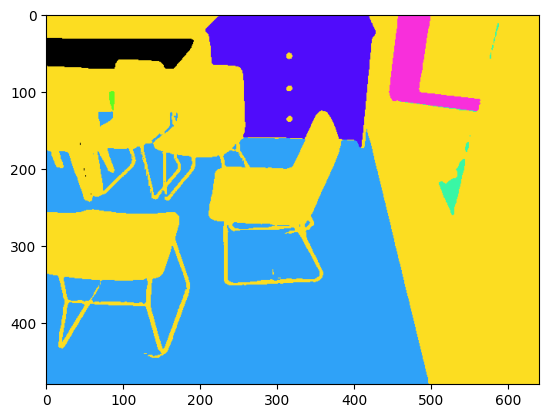

<Figure size 640x480 with 0 Axes>

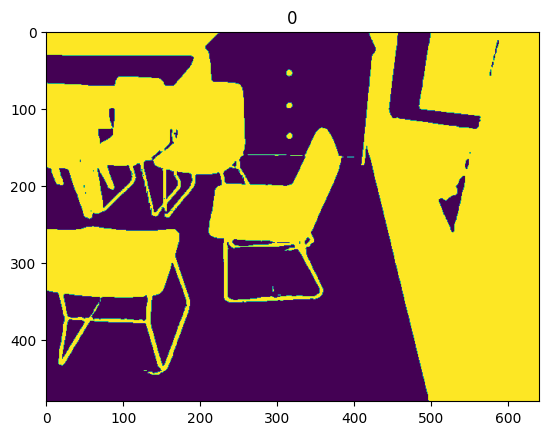

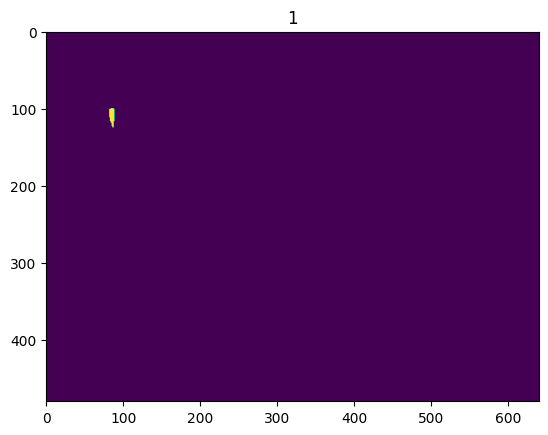

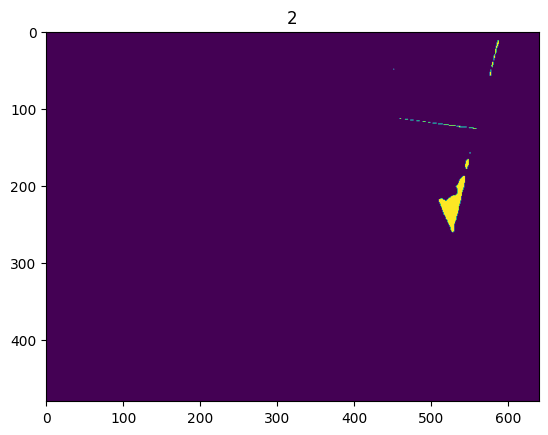

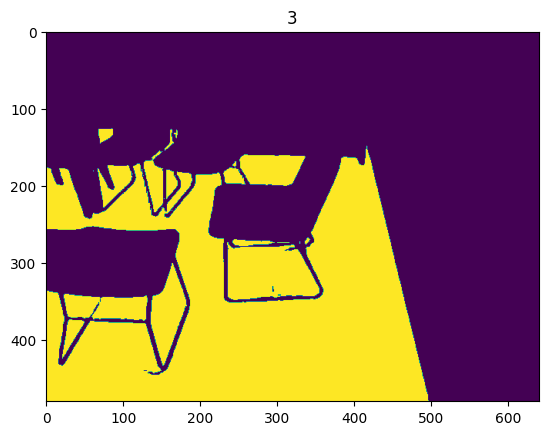

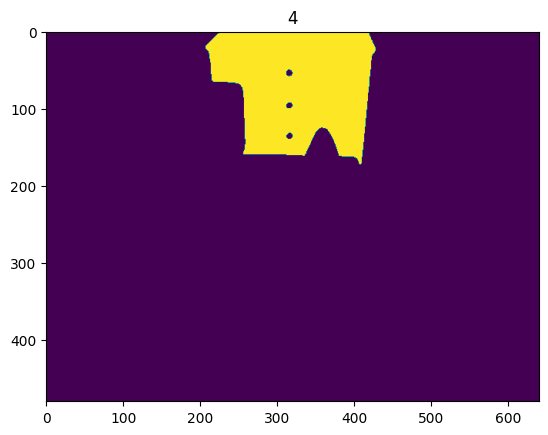

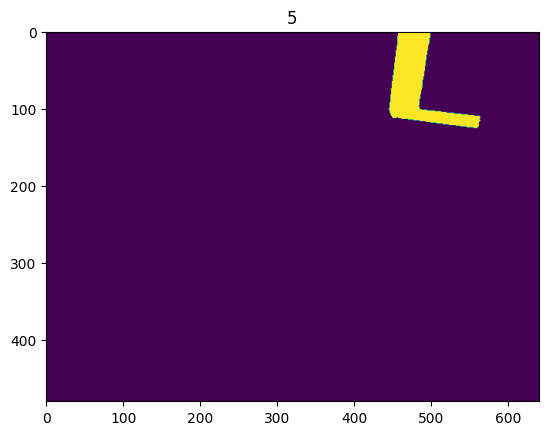

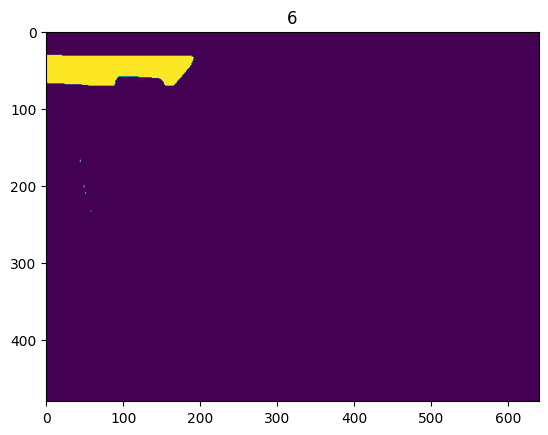

In [27]:

from utils.utils_or.utils_or_vis import vis_index_map

panoptic_seg_np = panoptic_seg.cpu().numpy()
panoptic_seg_np.dtype
plt.figure()
plt.imshow(vis_index_map(panoptic_seg_np+1))
plt.show()

plt.figure()
for __ in np.unique(panoptic_seg_np):
    plt.figure()
    plt.imshow(panoptic_seg_np == __)
    plt.title(__)
    plt.show()


In [33]:
predictions['instances']

Instances(num_instances=100, image_height=480, image_width=640, fields=[pred_masks: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0.

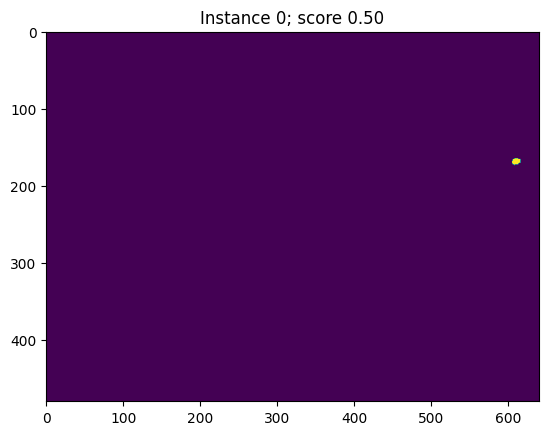

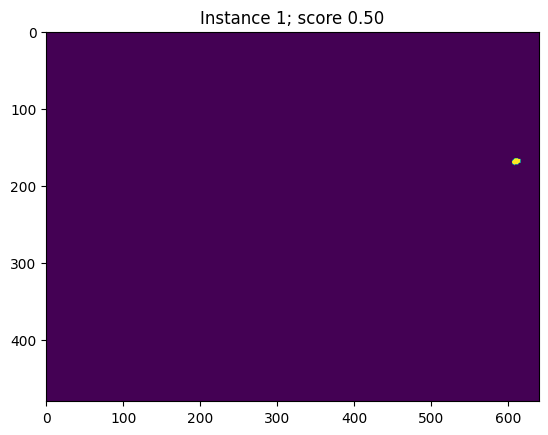

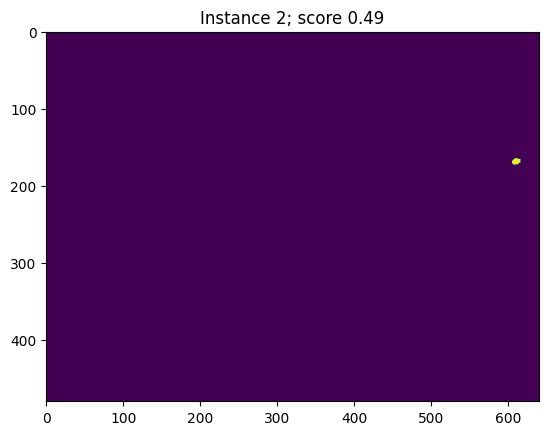

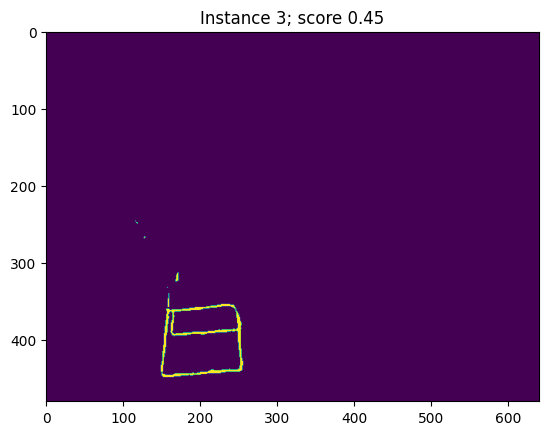

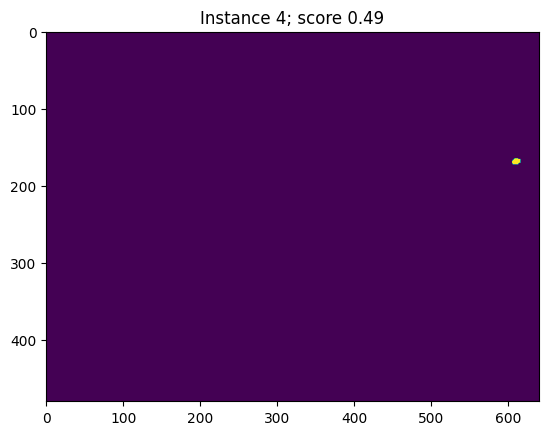

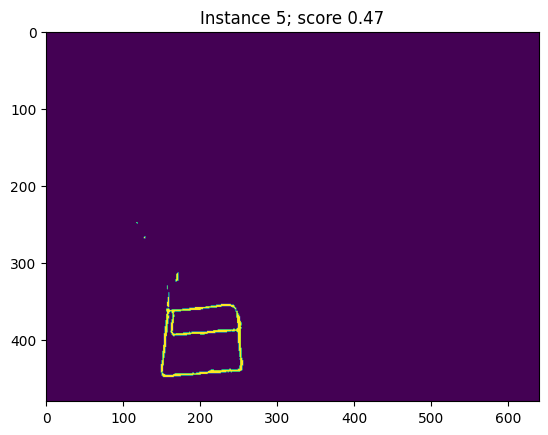

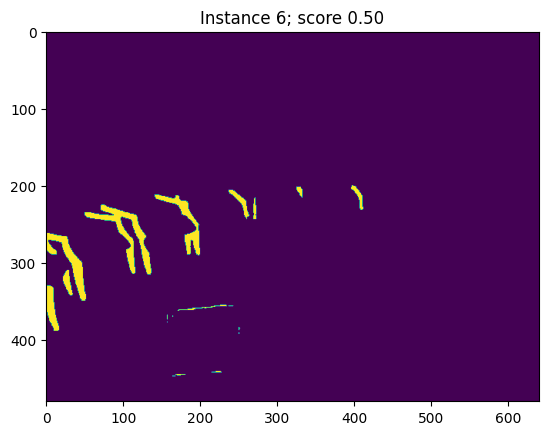

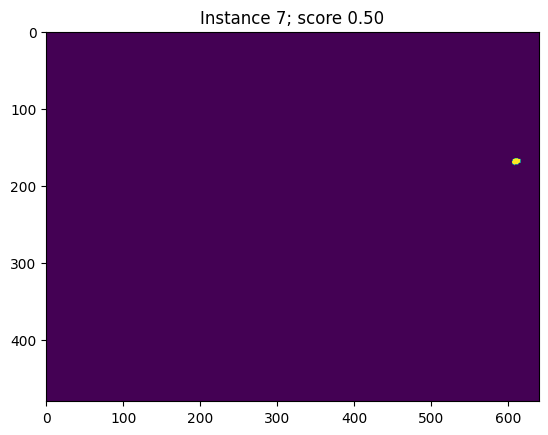

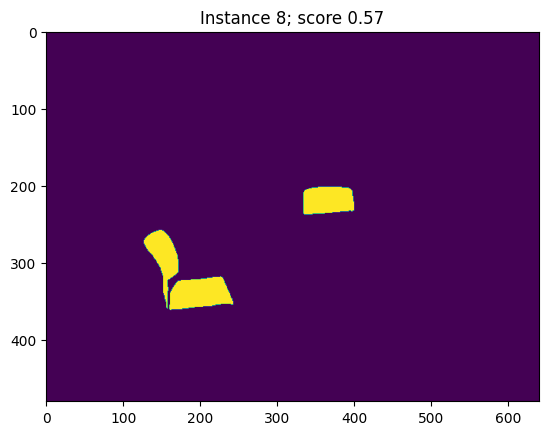

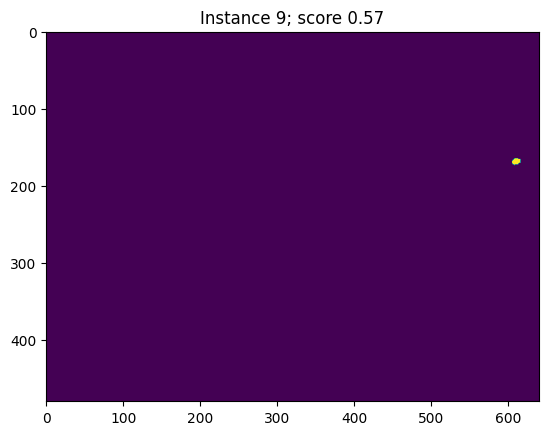

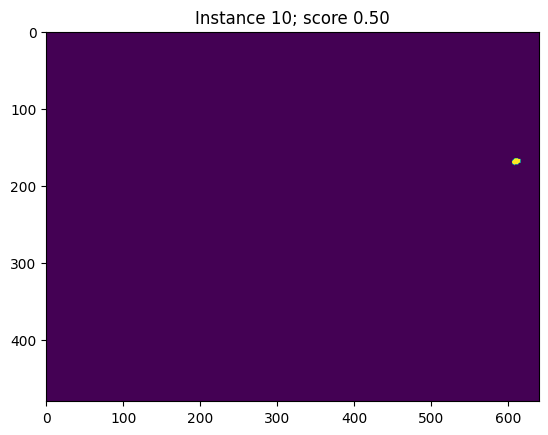

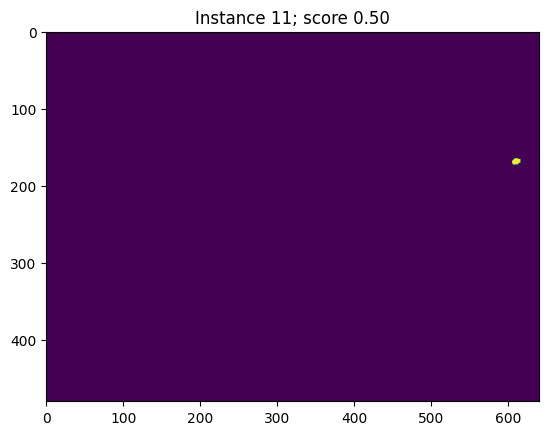

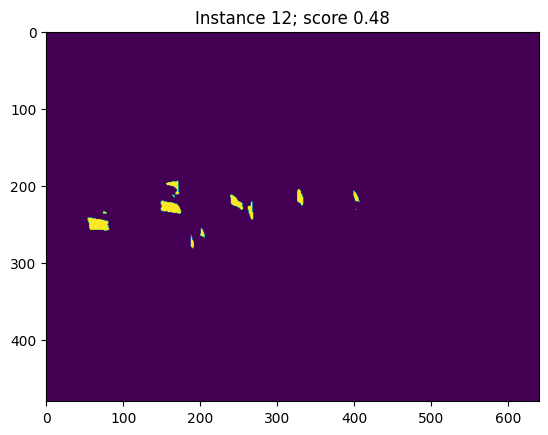

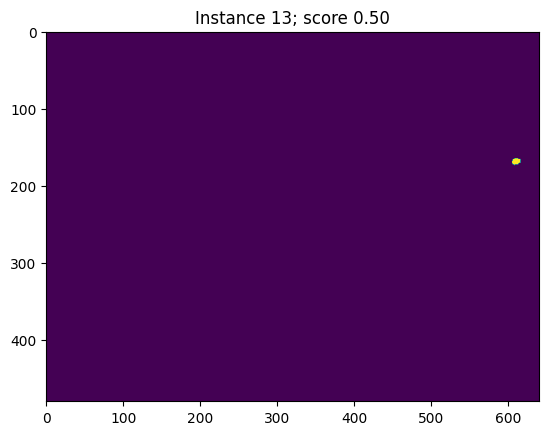

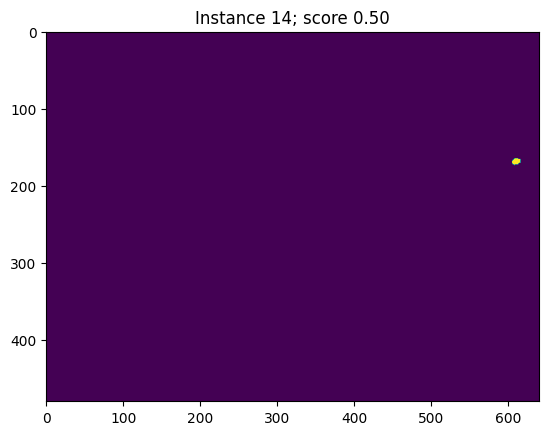

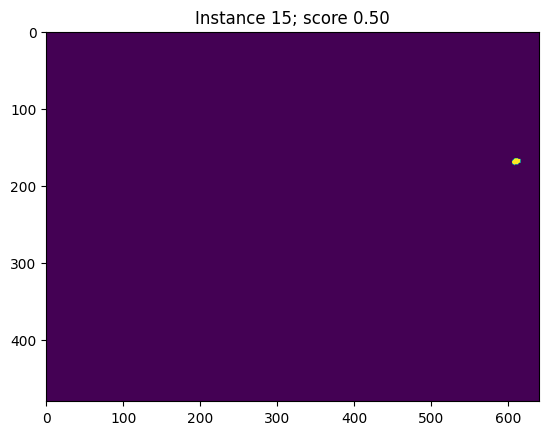

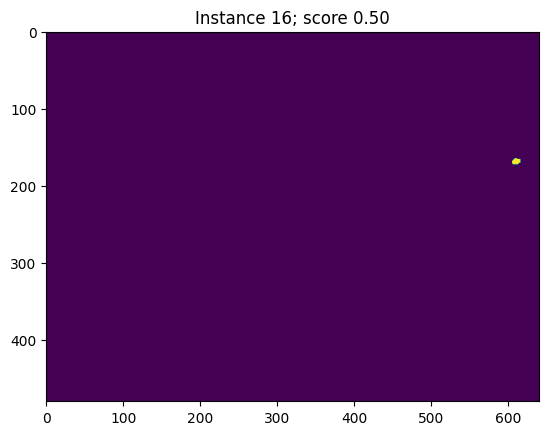

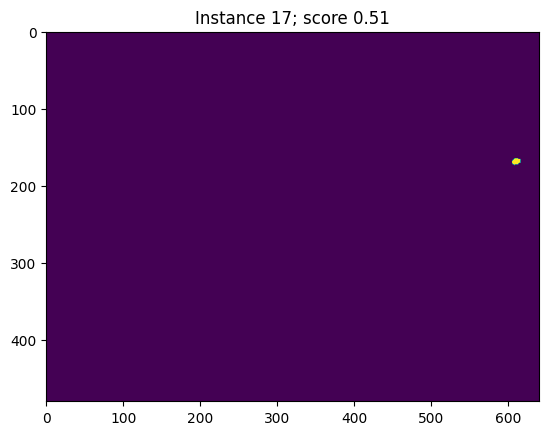

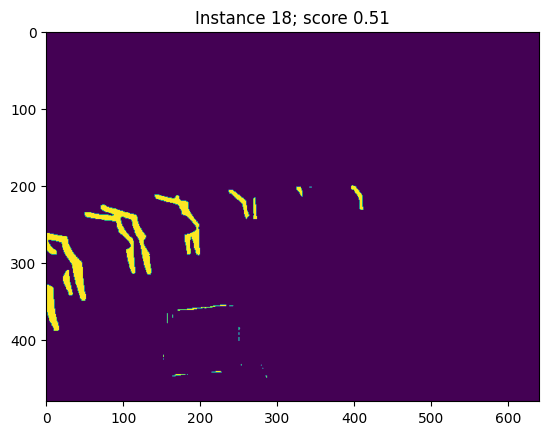

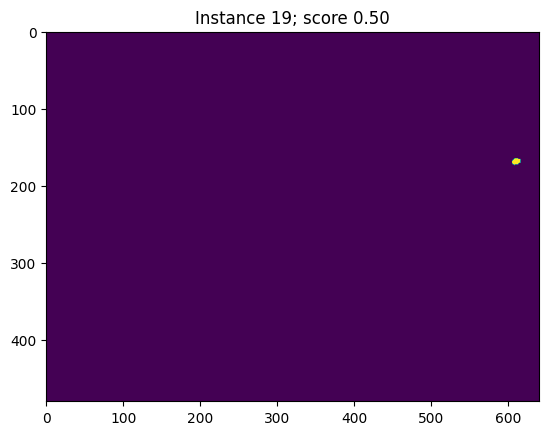

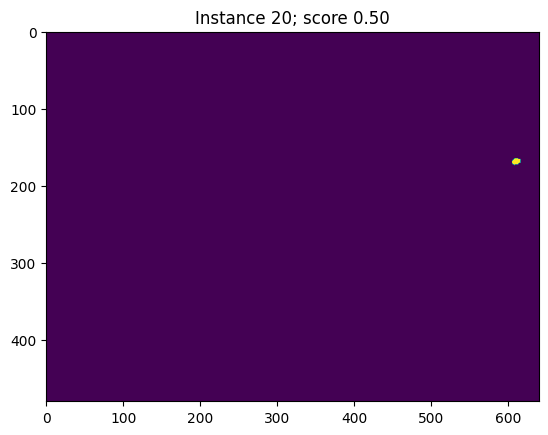

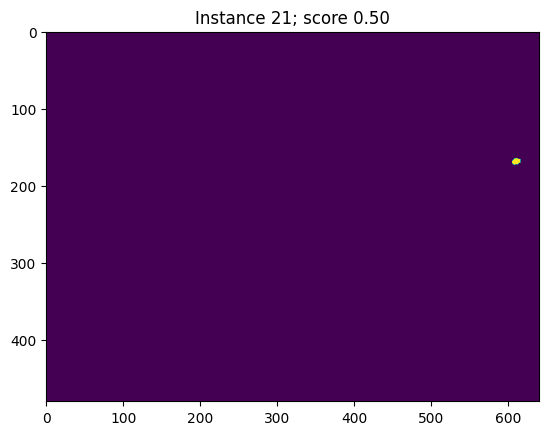

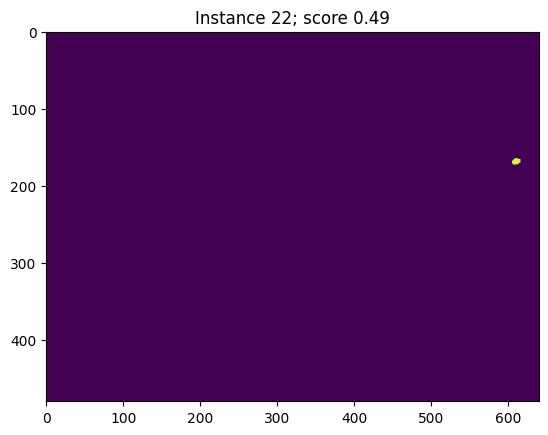

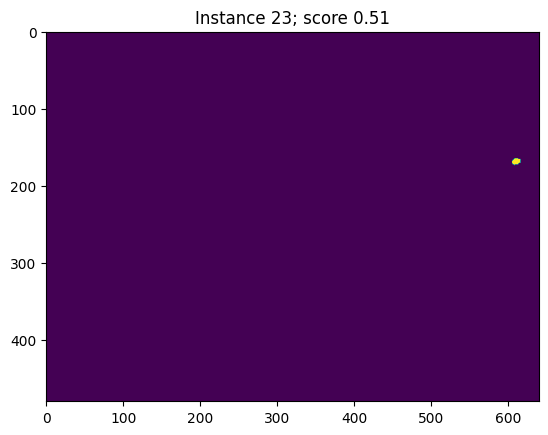

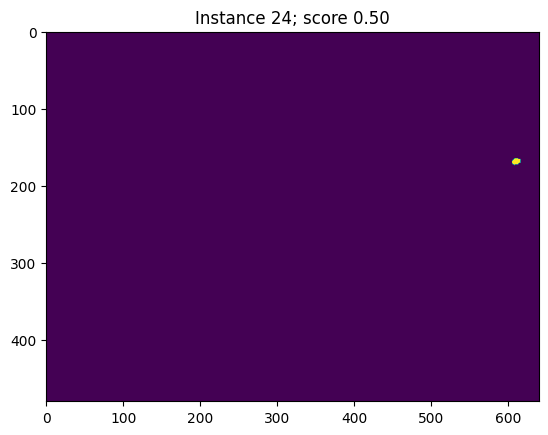

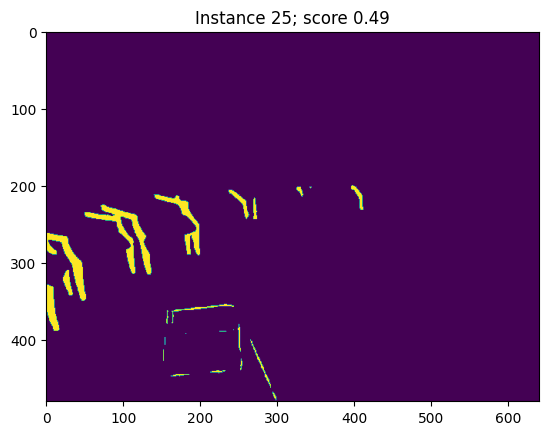

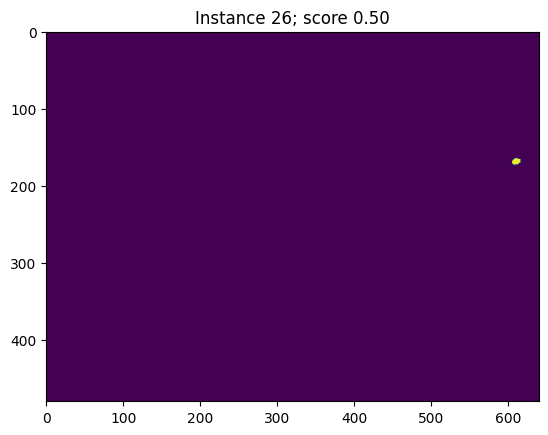

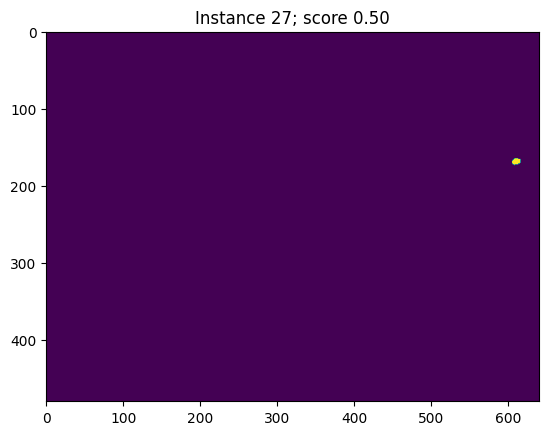

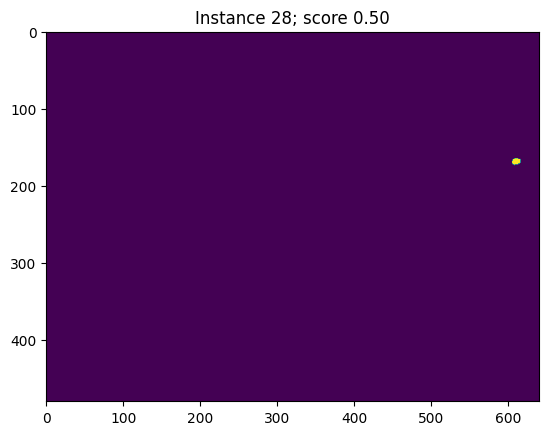

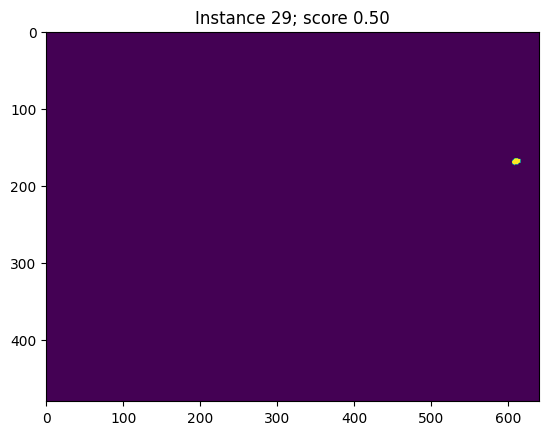

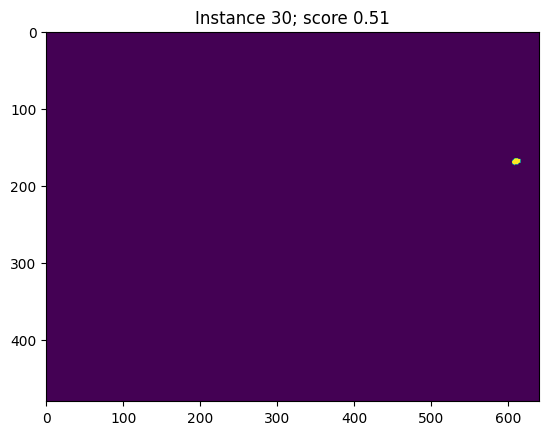

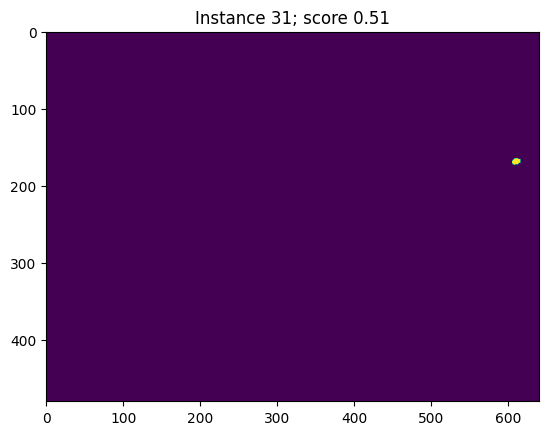

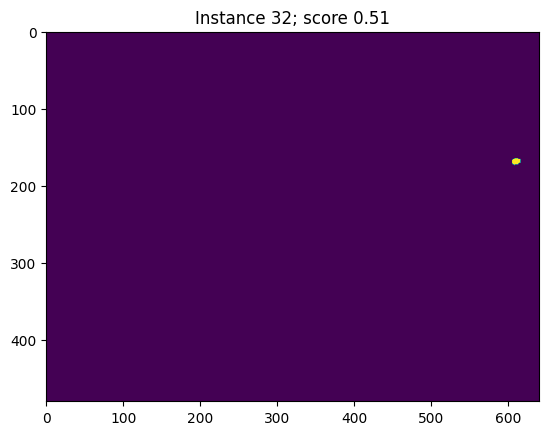

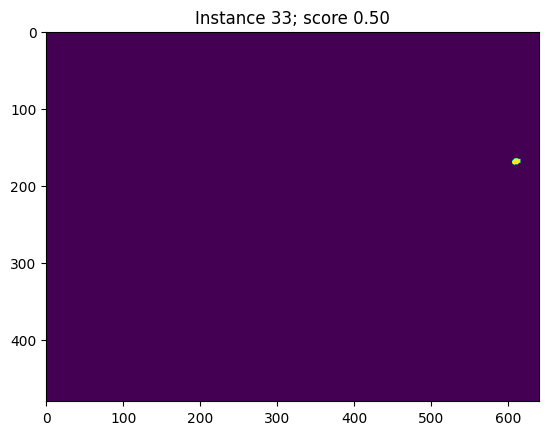

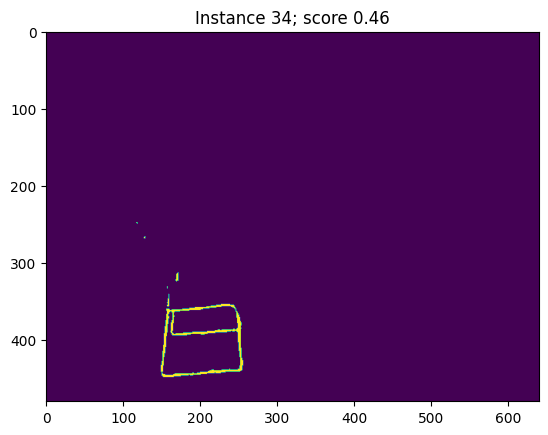

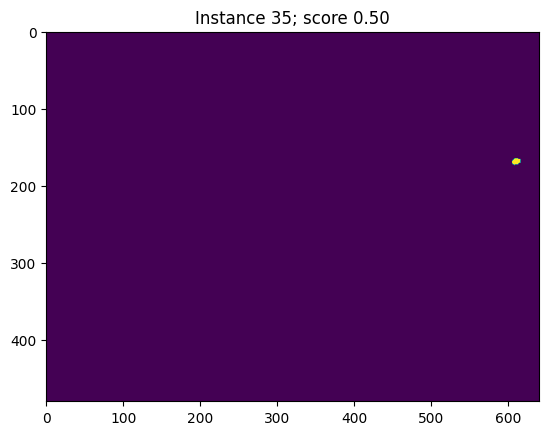

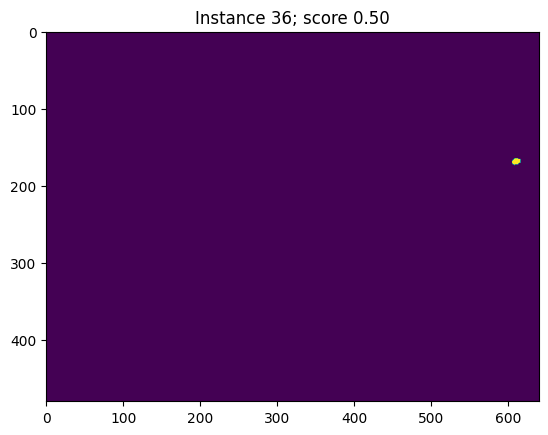

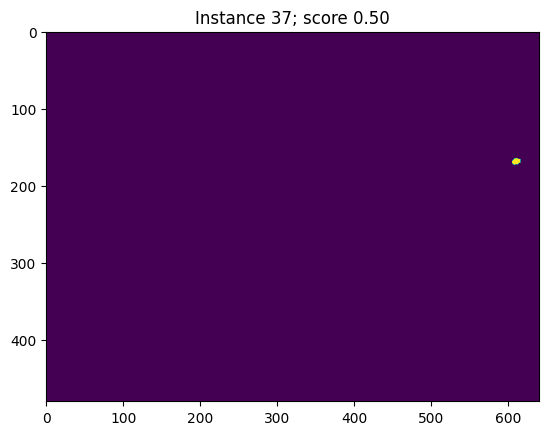

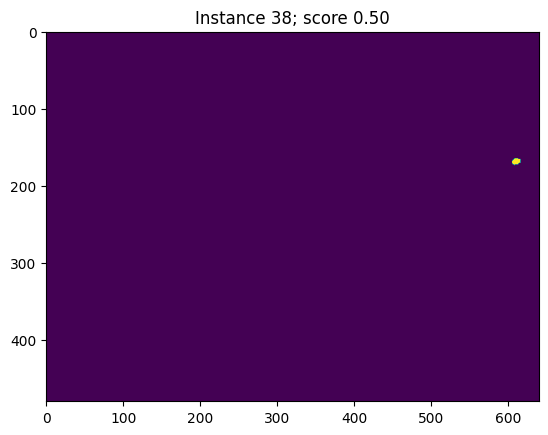

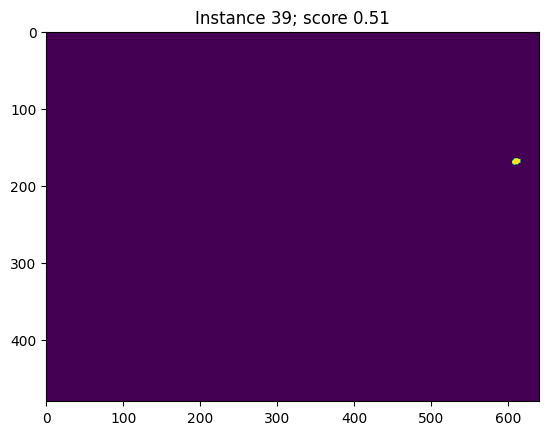

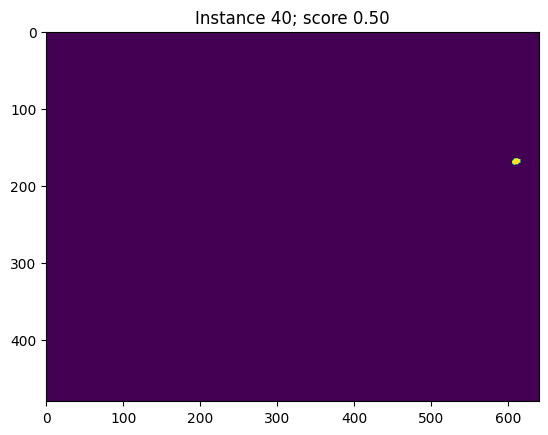

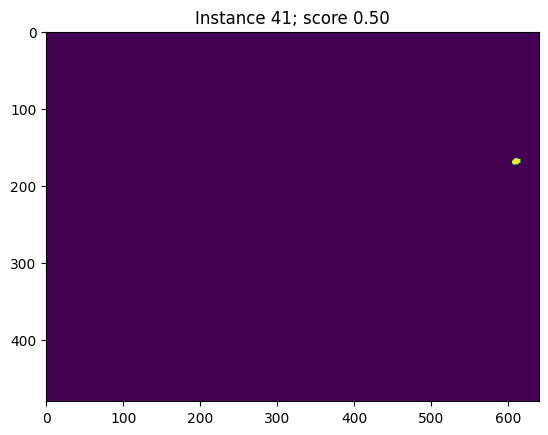

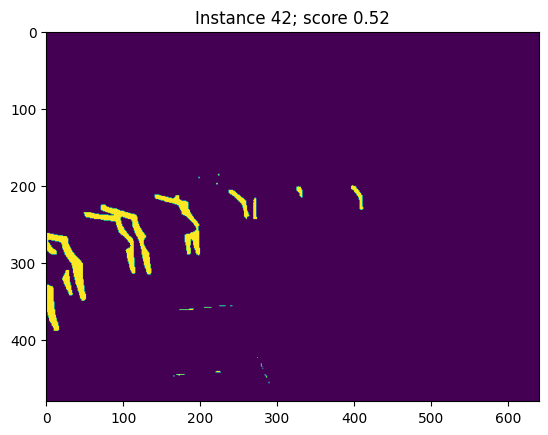

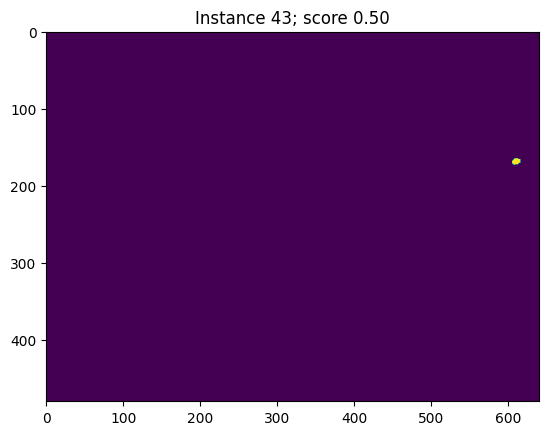

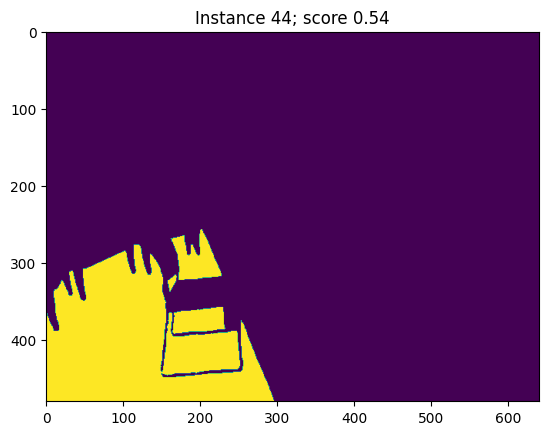

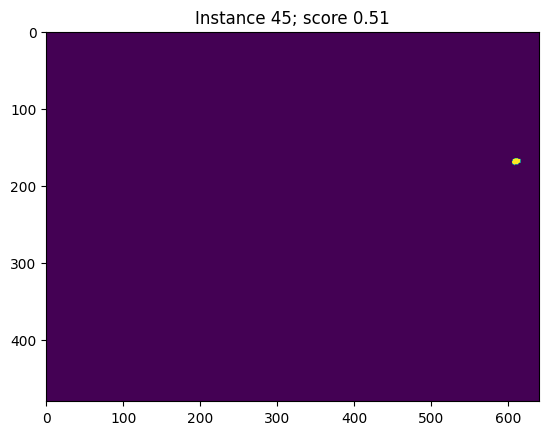

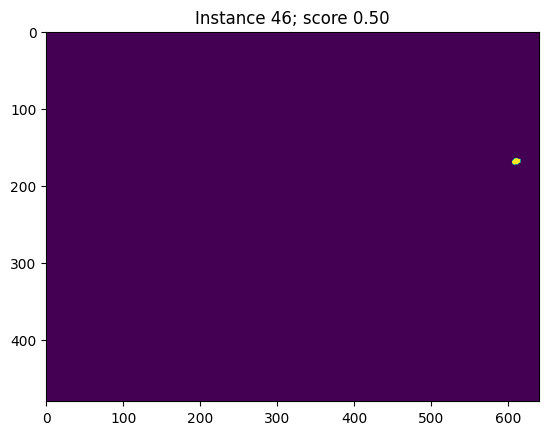

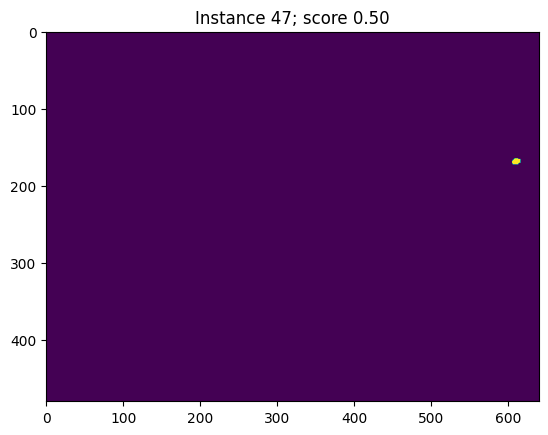

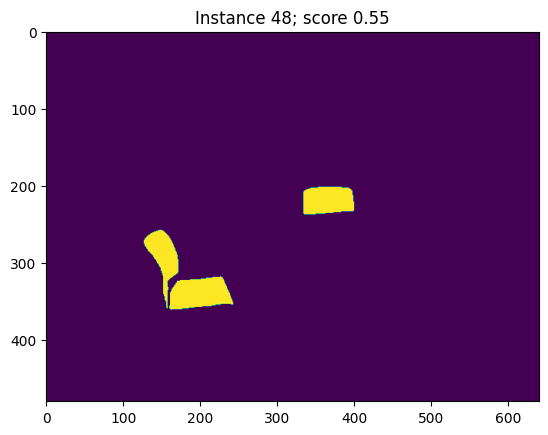

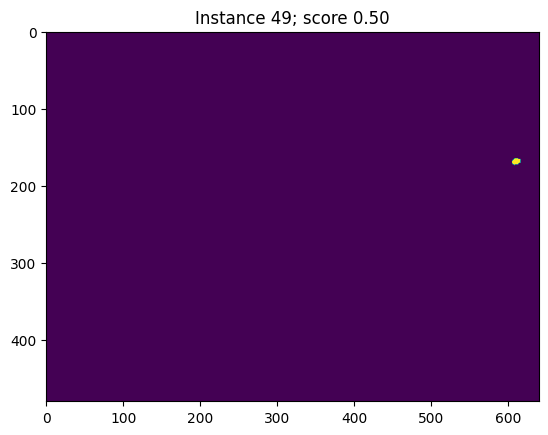

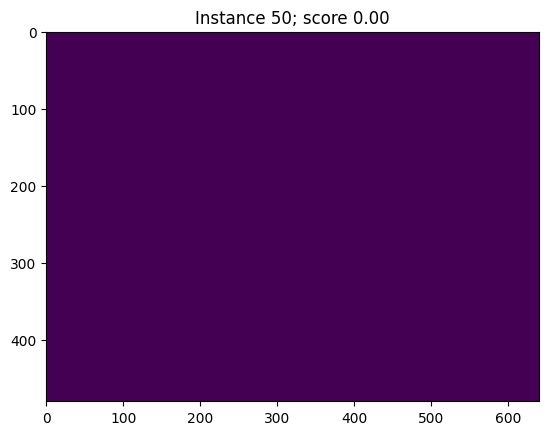

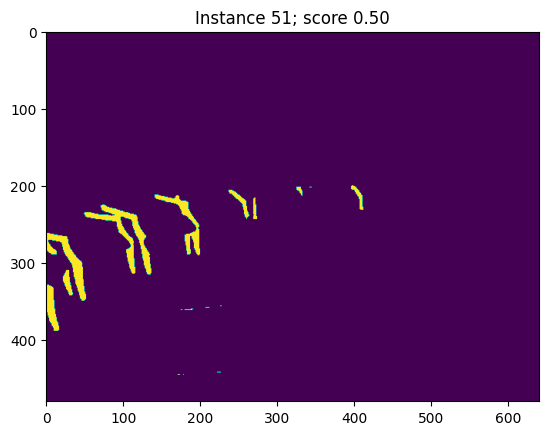

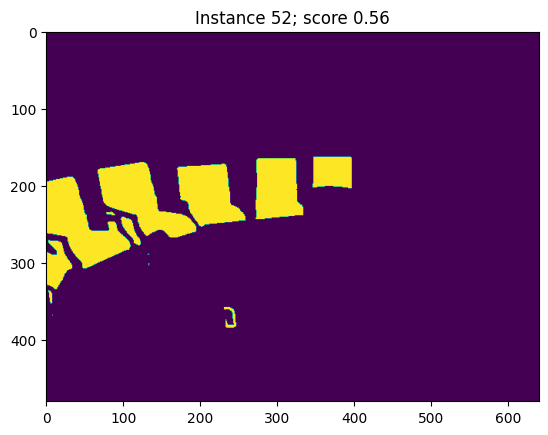

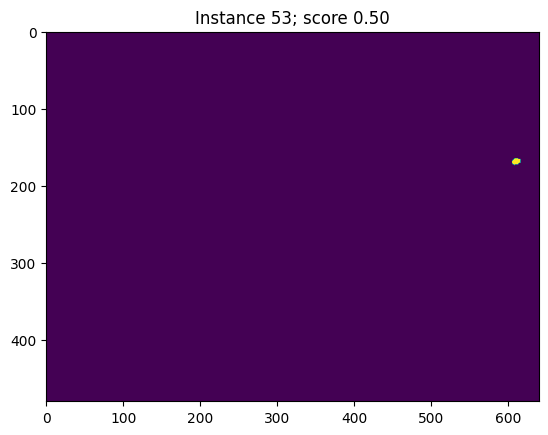

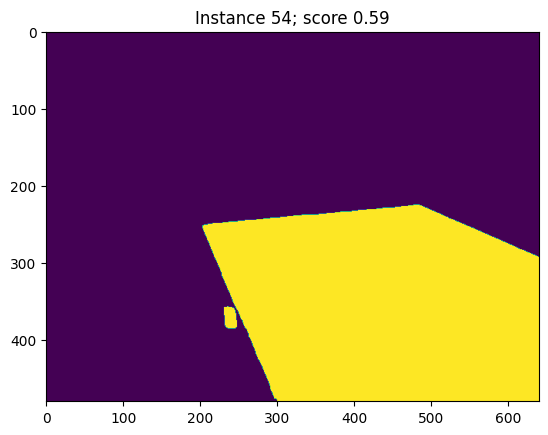

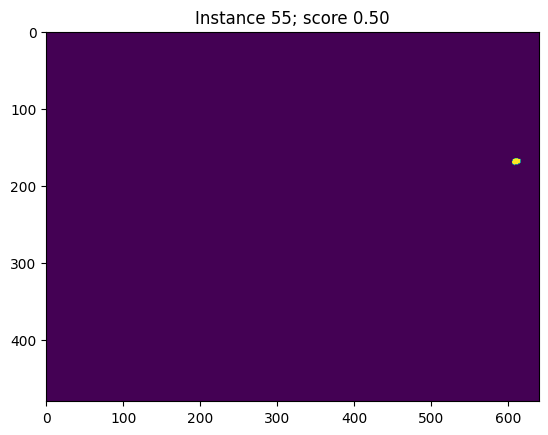

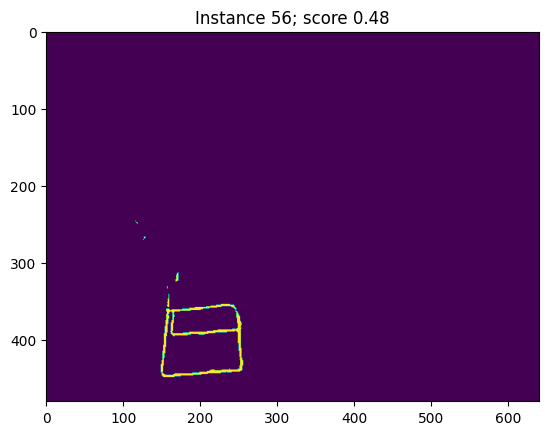

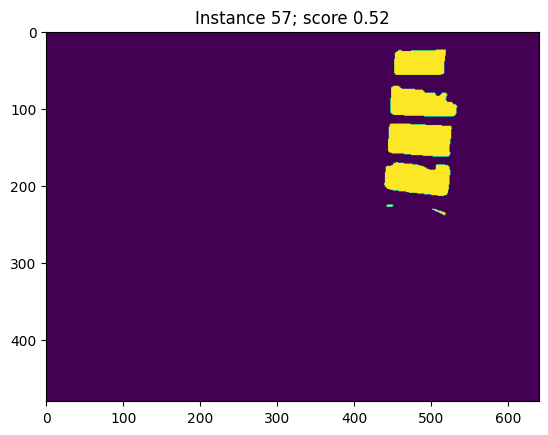

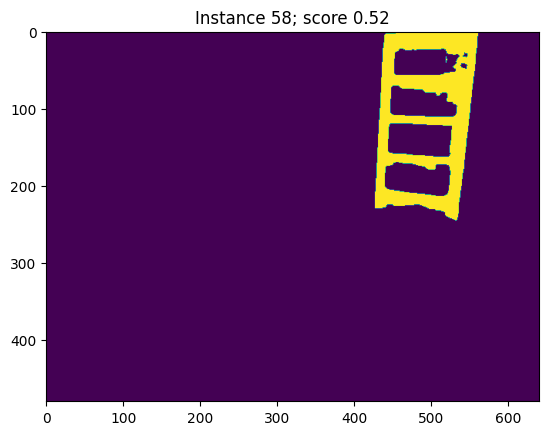

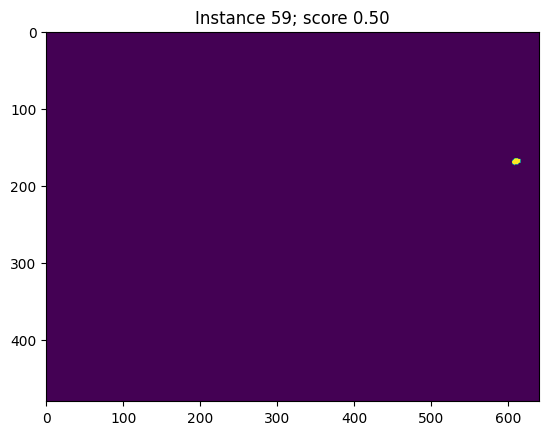

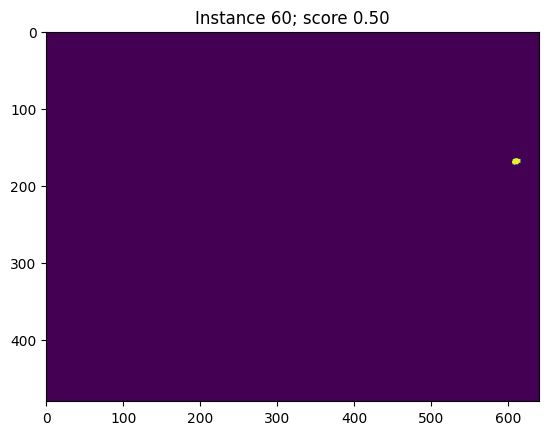

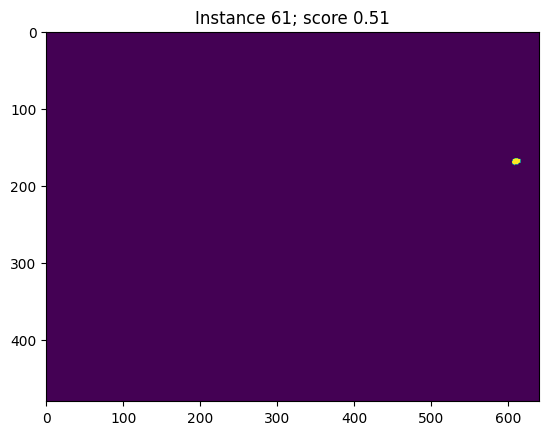

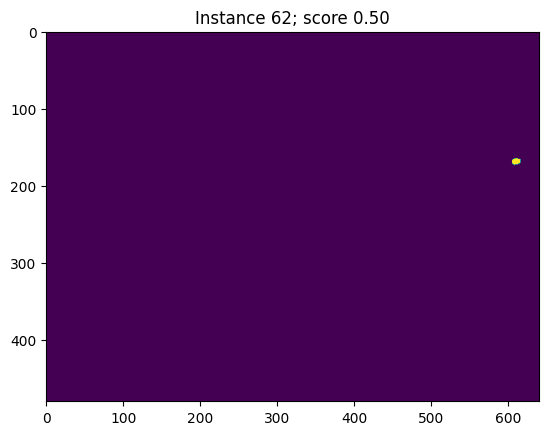

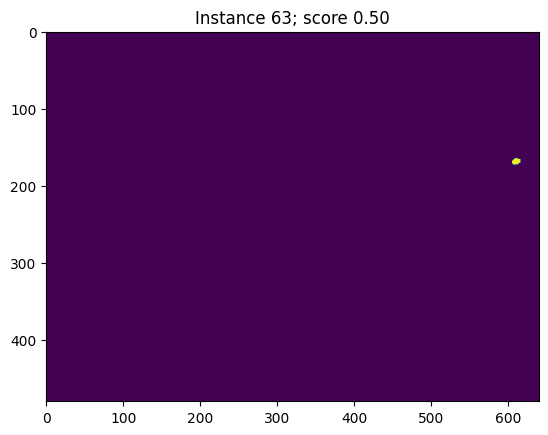

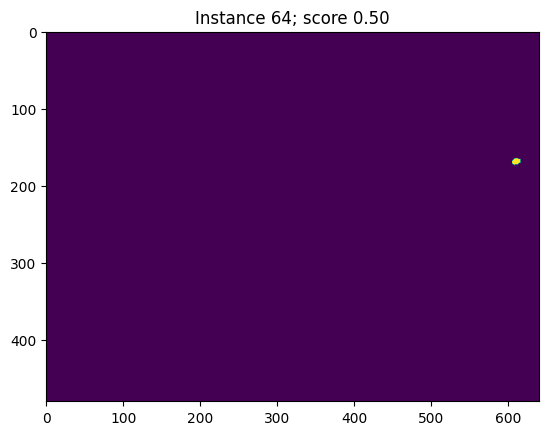

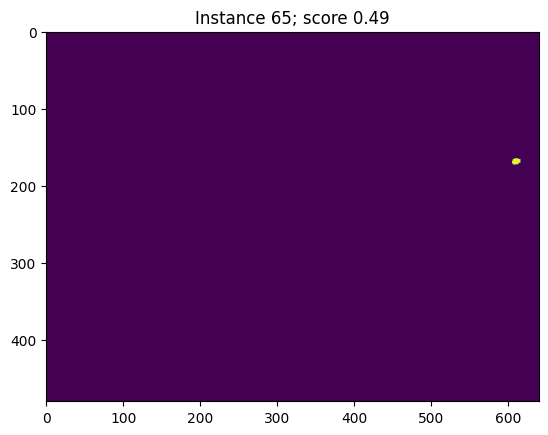

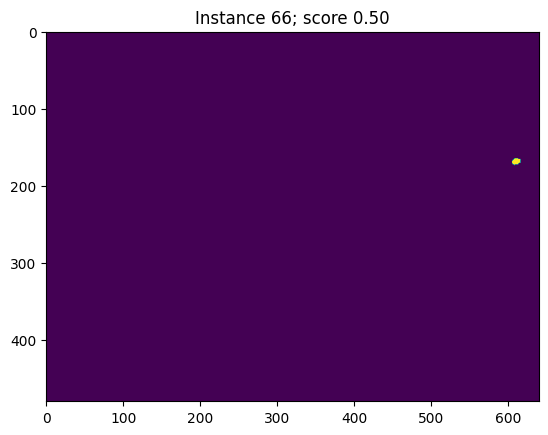

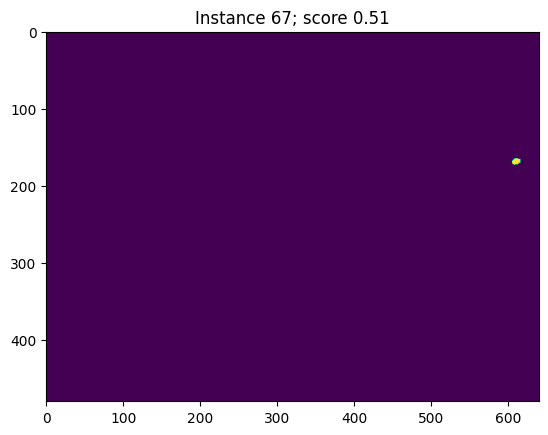

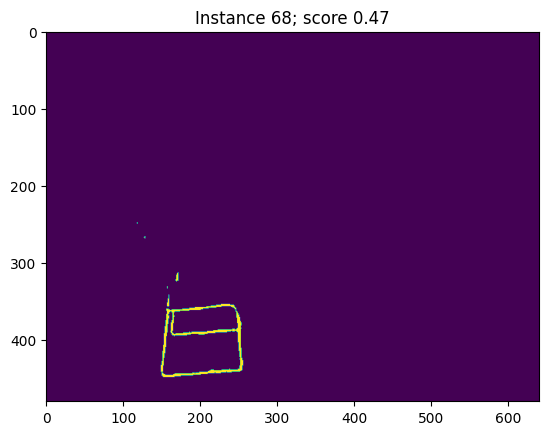

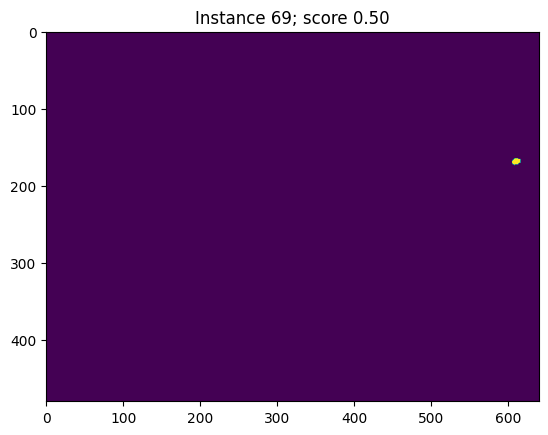

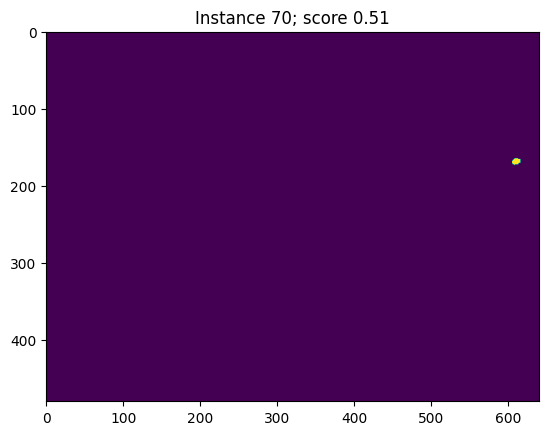

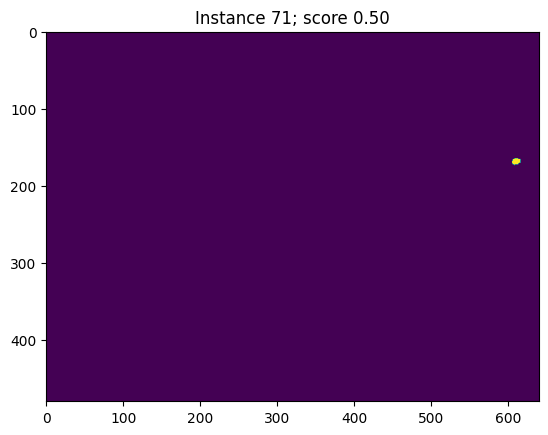

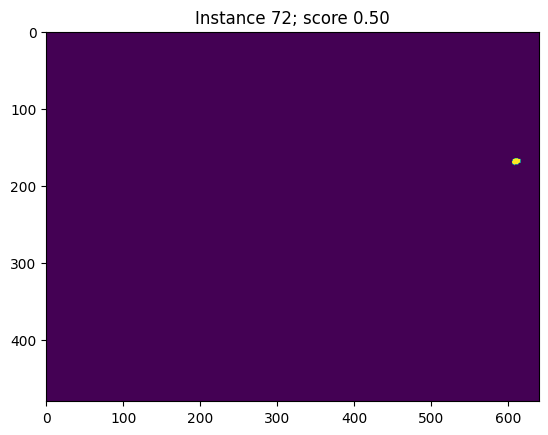

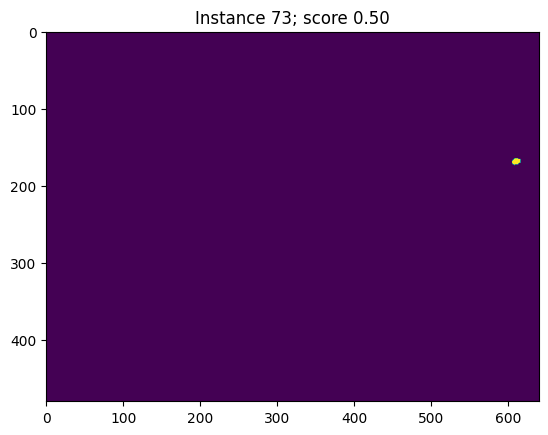

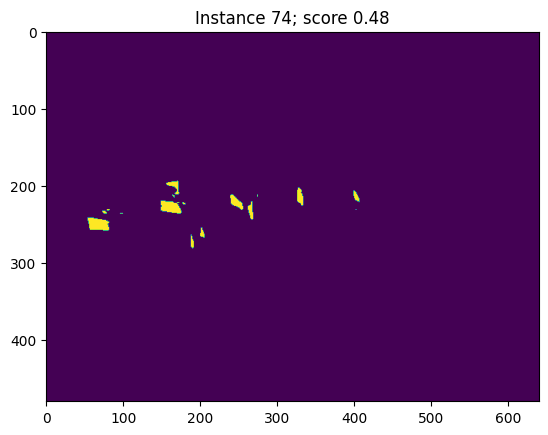

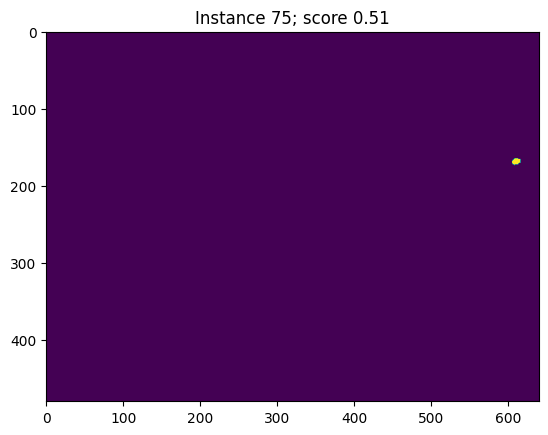

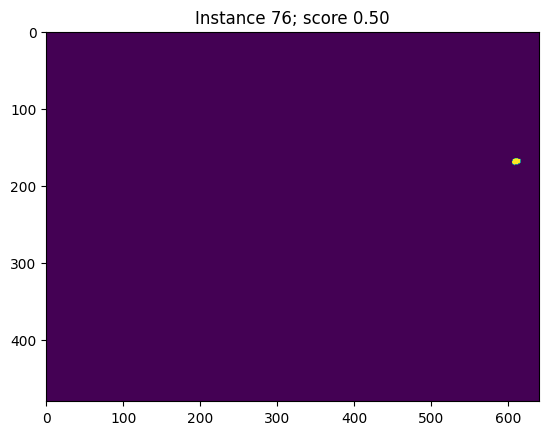

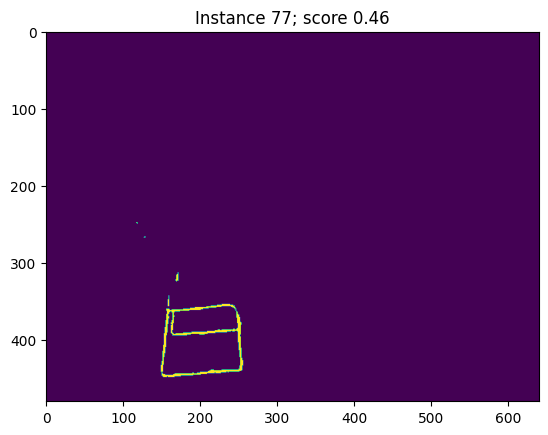

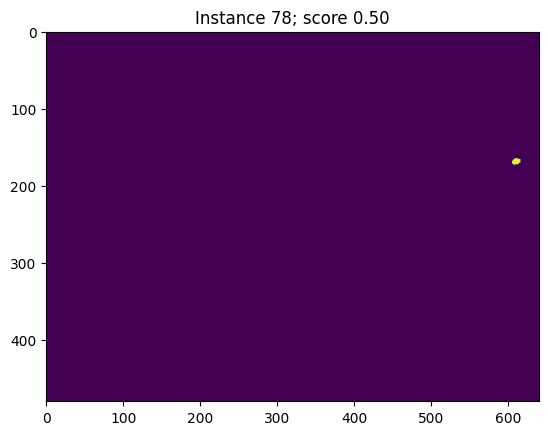

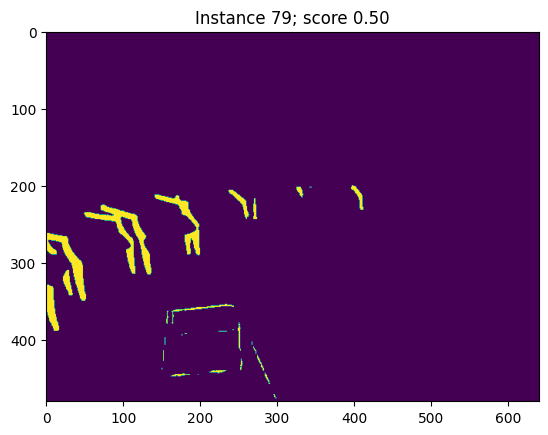

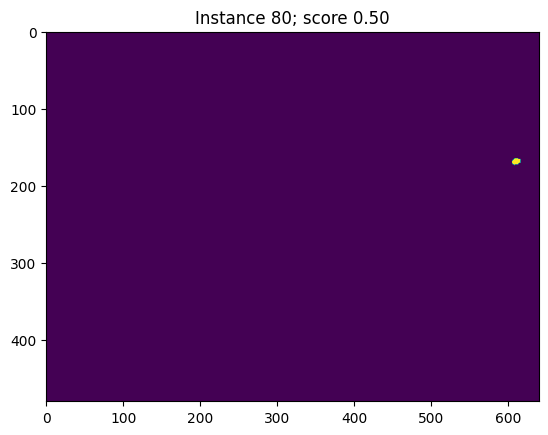

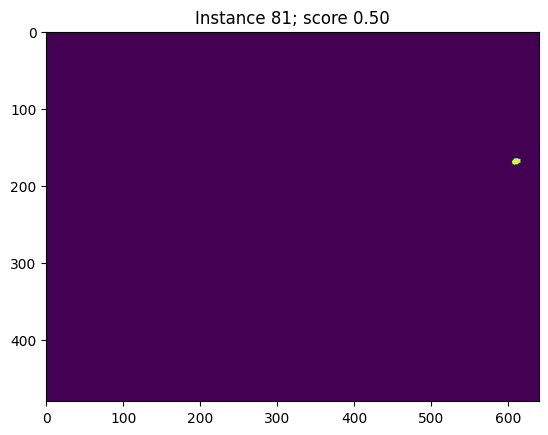

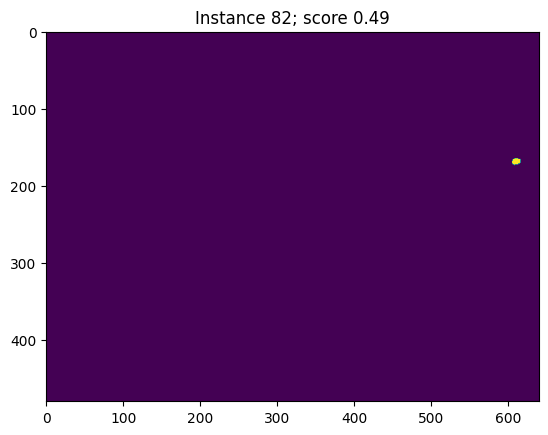

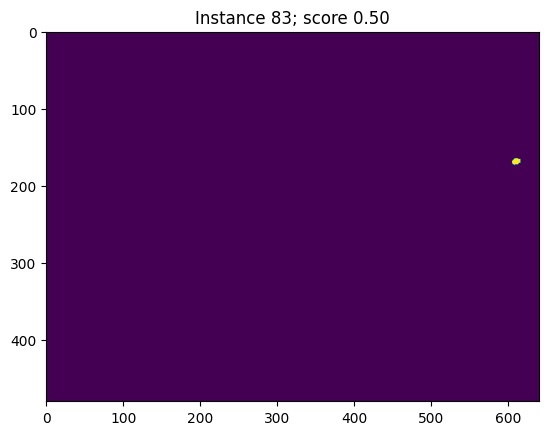

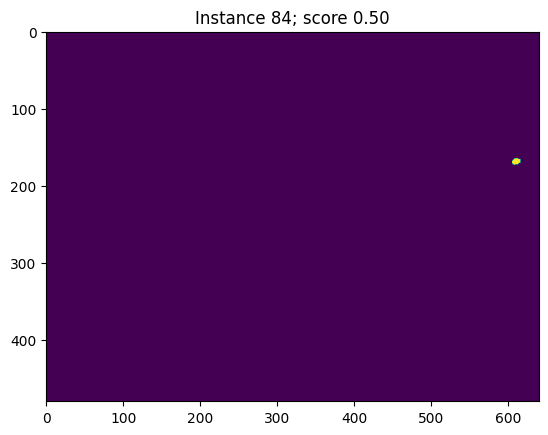

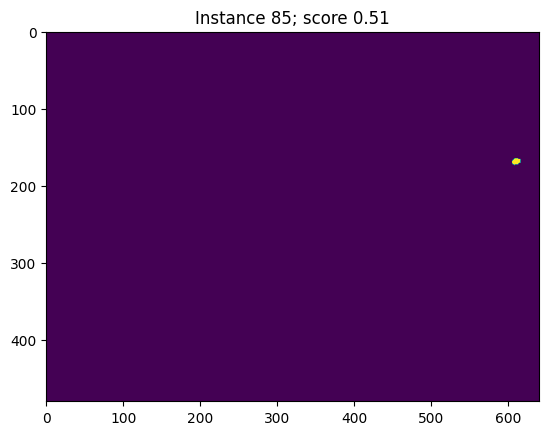

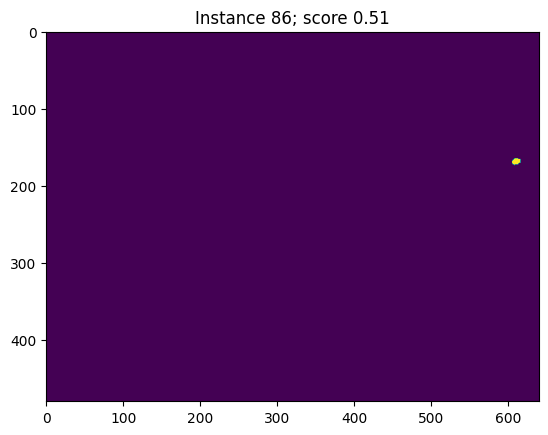

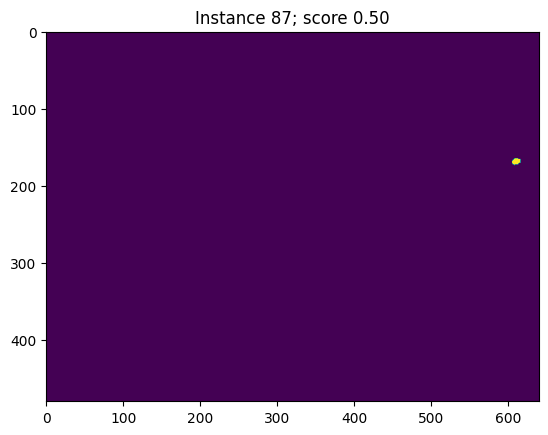

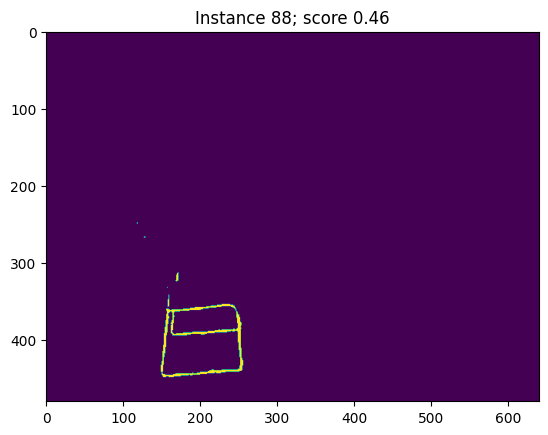

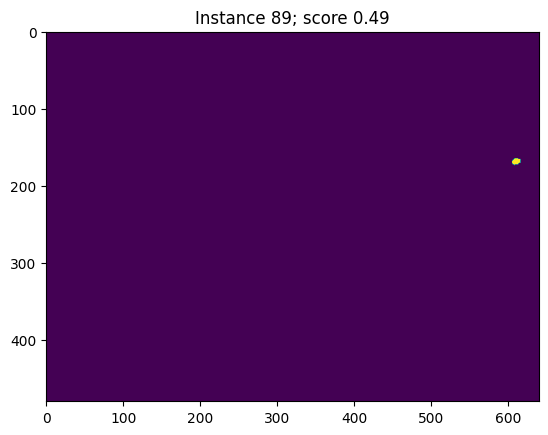

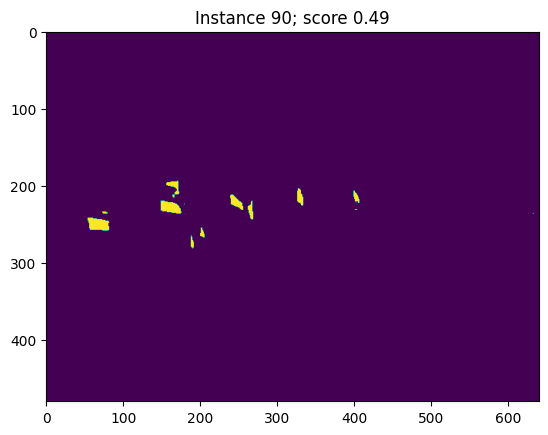

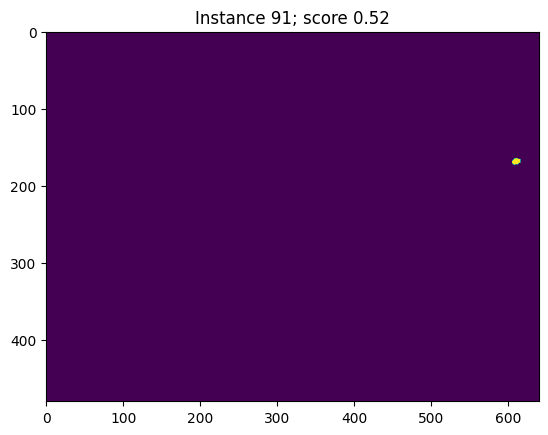

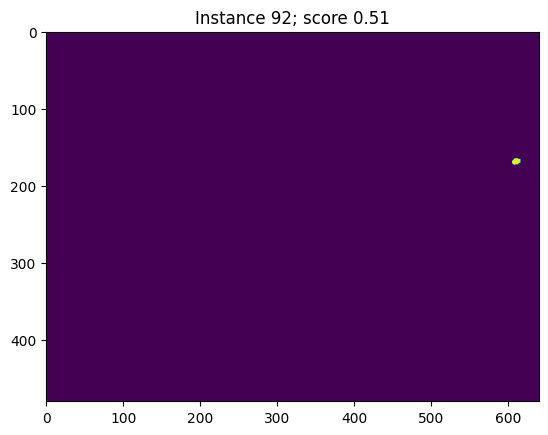

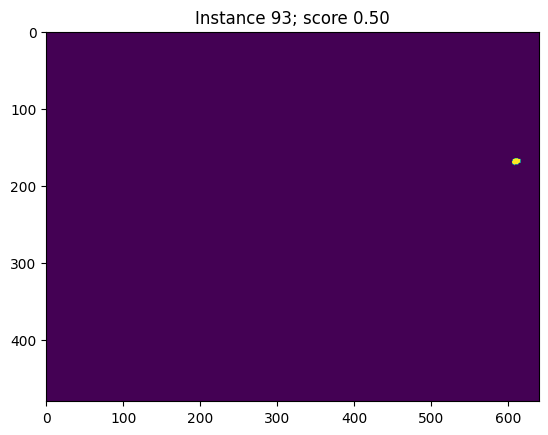

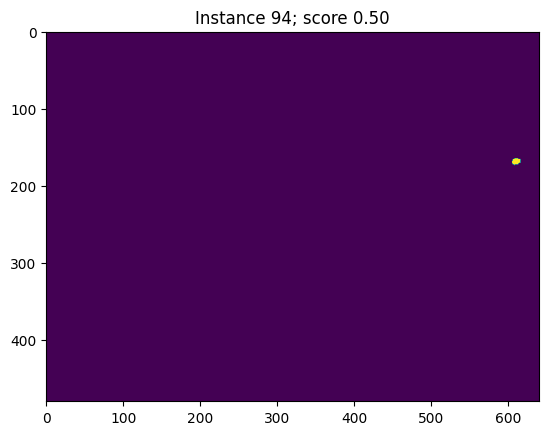

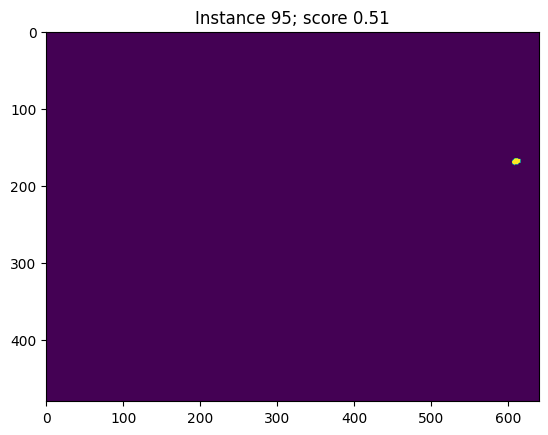

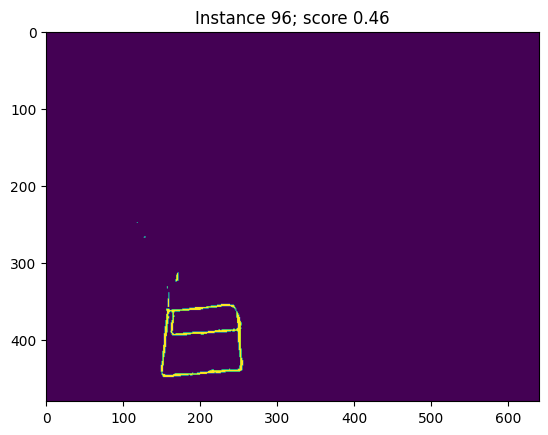

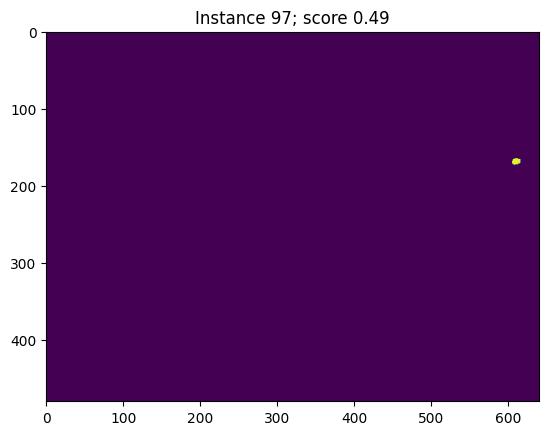

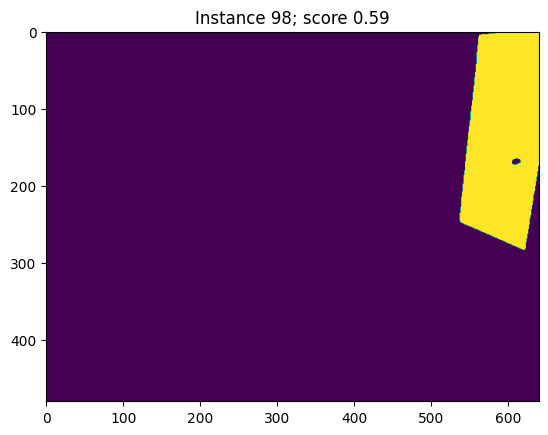

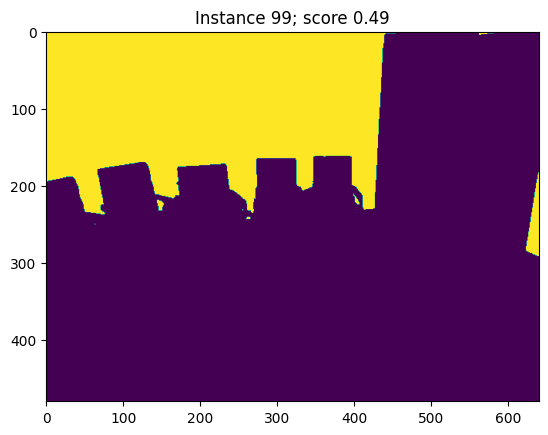

In [34]:
predictions['instances'].get('pred_masks').shape

for i in range(100):
    plt.figure()
    plt.imshow(predictions['instances'].get('pred_masks')[i].cpu().numpy())
    plt.title('Instance %d; score %.2f' % (i, predictions['instances'].get('scores')[i].item()))
    plt.show()